# Credit EDA Analysis

# Problem Statement : Analyse the patterns present in the data to ensure that the applicants who are capable of repaying the loan are not rejected

### Given conditions in data
#### Target = 1 when the client with payment difficulties
#### Target = 0 All other cases when the payment is paid on time
#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#### Approved: The Company has approved loan Application

#### Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

#### Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

#### Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In [178]:
#Import libraries pandas,numpy and matplotlib,seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# the commonly used alias for seaborn is sns
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
import matplotlib.ticker as ticker
from random import sample
import warnings
warnings.filterwarnings('ignore')
offline.init_notebook_mode()
# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

#Read the CSV from application dataset
app_data = pd.read_csv("application_data.csv")

#Read the CSV from previous application dataset
prev_data = pd.read_csv("previous_application.csv")

#Run the profile for application_data
#profile = pandas_profiling.ProfileReport(app_data)
#profile.to_file(outputfile="myoutputfile.html")

#Get the values
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# Analyse the Application data

In [179]:
#Make a copy of original data
app_data_cp = app_data

app_data_cp.shape # 307511 rows and 122 columns

#Check the null values, na, percentage, duplicates
app_data_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_unique', 'values_count_nounique', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in app_data_cp.columns:
    tmp['column'] = [c]
    tmp['values'] = [app_data_cp[c].unique()]
    tmp['values_count_unique'] = len(list(app_data_cp[c].unique()))
    tmp['values_count_nounique'] = int(app_data_cp[c].nunique())
    tmp['num_miss'] = app_data_cp[c].isnull().sum()
    tmp['pct_miss'] = (app_data_cp[c].isnull().sum()/ len(app_data_cp)).round(3)*100
    app_data_stats = app_data_stats.append(tmp)
    
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
app_data_stats.sort_values(by = 'values_count_unique', inplace = True, ascending = True)

# And set the index to Column Names
app_data_stats.set_index('column', inplace = True)
app_data_stats.sort_values(by = 'pct_miss', ascending = False).head(60)

values  \
column                                                                            
COMMONAREA_AVG                [0.0143, 0.0605, nan, 0.0582, 0.1143, 0.0018, ...   
COMMONAREA_MODE               [0.0144, 0.0497, nan, 0.0587, 0.1153, 0.0018, ...   
COMMONAREA_MEDI               [0.0144, 0.0608, nan, 0.0585, 0.115, 0.0018, 0...   
NONLIVINGAPARTMENTS_AVG       [0.0, 0.0039, nan, 0.0193, 0.0077, 0.0019, 0.0...   
NONLIVINGAPARTMENTS_MEDI      [0.0, 0.0039, nan, 0.0194, 0.0078, 0.0019, 0.0...   
NONLIVINGAPARTMENTS_MODE      [0.0, nan, 0.0195, 0.0078, 0.0039, 0.0661, 0.1...   
FONDKAPREMONT_MODE            [reg oper account, nan, org spec account, reg ...   
LIVINGAPARTMENTS_MODE         [0.022000000000000002, 0.079, nan, 0.1313, 0.3...   
LIVINGAPARTMENTS_MEDI         [0.0205, 0.0787, nan, 0.1223, 0.2899, 0.0231, ...   
LIVINGAPARTMENTS_AVG          [0.0202, 0.0773, nan, 0.1202, 0.2849, 0.0227, ...   
FLOORSMIN_MODE                [0.125, 0.3333, nan, 0.375, 0.7083, 0.0417, 0....   
FLOORSMIN_AVG                 [0.125, 0.3333, nan, 0.375, 0.7083, 0.0417, 0....   
FLOORSMIN_MEDI                [0.125, 0.3333, nan, 0.375, 0.7083, 0.0417, 0....   
YEARS_BUILD_MODE              [0.6341, 0.804, nan, 0.7452, 0.9804, 0.8432, 0...   
YEARS_BUILD_MEDI              [0.6243, 0.7987, nan, 0.7383, 0.9799, 0.839000...   
YEARS_BUILD_AVG               [0.6192, 0.7959999999999999, nan, 0.7348, 0.97...   
OWN_CAR_AGE                   [nan, 26.0, 17.0, 8.0, 23.0, 7.0, 14.0, 1.0, 3...   
LANDAREA_MODE                 [0.0377, 0.0128, nan, 0.0138, 0.0952, 0.1798, ...   
LANDAREA_MEDI                 [0.0375, 0.0132, nan, 0.0137, 0.0947, 0.1789, ...   
LANDAREA_AVG                  [0.0369, 0.013000000000000001, nan, 0.0135, 0....   
BASEMENTAREA_MODE             [0.0383, 0.0538, nan, 0.10099999999999999, 0.1...   
BASEMENTAREA_AVG              [0.0369, 0.0529, nan, 0.0973, 0.1335, 0.0617, ...   
BASEMENTAREA_MEDI             [0.0369, 0.0529, nan, 0.0973, 0.1335, 0.0617, ...   
EXT_SOURCE_1                  [0.08303696739132256, 0.3112673113812225, nan,...   
NONLIVINGAREA_MODE            [0.0, nan, 0.106, 0.0047, 0.0045, 0.0065, 0.04...   
NONLIVINGAREA_AVG             [0.0, 0.0098, nan, 0.1001, 0.0044, 0.0007, 0.0...   
NONLIVINGAREA_MEDI            [0.0, 0.01, nan, 0.1022, 0.0045, 0.0007, 0.004...   
ELEVATORS_MEDI                [0.0, 0.08, nan, 0.16, 0.4, 0.14, 0.28, 0.04, ...   
ELEVATORS_AVG                 [0.0, 0.08, nan, 0.16, 0.4, 0.14, 0.28, 0.04, ...   
ELEVATORS_MODE                [0.0, 0.0806, nan, 0.1611, 0.4028, 0.1208, 0.2...   
WALLSMATERIAL_MODE            [Stone, brick, Block, nan, Panel, Mixed, Woode...   
APARTMENTS_AVG                [0.0247, 0.0959, nan, 0.0825, 0.1474, 0.3495, ...   
APARTMENTS_MEDI               [0.025, 0.0968, nan, 0.0833, 0.1489, 0.3529, 0...   
APARTMENTS_MODE               [0.0252, 0.0924, nan, 0.084, 0.1502, 0.3561, 0...   
ENTRANCES_MEDI                [0.069, 0.0345, nan, 0.2069, 0.1379, 0.1724, 0...   
ENTRANCES_MODE                [0.069, 0.0345, nan, 0.2069, 0.1379, 0.1724, 0...   
ENTRANCES_AVG                 [0.069, 0.0345, nan, 0.2069, 0.1379, 0.1724, 0...   
LIVINGAREA_MODE               [0.0198, 0.0554, nan, 0.081, 0.1456, 0.3932, 0...   
LIVINGAREA_MEDI               [0.0193, 0.0558, nan, 0.0792, 0.1422, 0.3842, ...   
LIVINGAREA_AVG                [0.019, 0.0549, nan, 0.0778, 0.1397, 0.3774, 0...   
HOUSETYPE_MODE                [block of flats, nan, terraced house, specific...   
FLOORSMAX_MEDI                [0.0833, 0.2917, nan, 0.1667, 0.3333, 0.6667, ...   
FLOORSMAX_MODE                [0.0833, 0.2917, nan, 0.1667, 0.3333, 0.6667, ...   
FLOORSMAX_AVG                 [0.0833, 0.2917, nan, 0.1667, 0.3333, 0.6667, ...   
YEARS_BEGINEXPLUATATION_MEDI  [0.9722, 0.9851, nan, 0.9811, 0.9806, 0.9985, ...   
YEARS_BEGINEXPLUATATION_MODE  [0.9722, 0.9851, nan, 0.9811, 0.9806, 0.9985, ...   
YEARS_BEGINEXPLUATATION_AVG   [0.9722, 0.9851, nan, 0.9811, 0.9806, 0.9985, ...   
TOTALA

Analyse Columns and decision to drop from dataset 

#### columns having around 70% missing values 
 COMMONAREA_AVG,COMMONAREA_AVG,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,
 FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,FLOORSMIN_MODE,FLOORSMIN_AVG,
 FLOORSMIN_MEDI,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,OWN_CAR_AGE
 
#### As per python profiling report below columns have more then 70% of 0's value as this is related to query abount client so 0 
#### value denotes no queries
AMT_REQ_CREDIT_BUREAU_DAY 
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK

#### As per python profiling report these boolean columns having very less number of 1 as compare to 0's less than 10%
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_5
FLAG_DOCUMENT_19
FLAG_DOCUMENT_2
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
FLAG_DOCUMENT_18
FLAG_DOCUMENT_4
FLAG_DOCUMENT_7
FLAG_DOCUMENT_9
FLAG_MOBIL


In [180]:

# Drop all the columns
col_drop =['COMMONAREA_AVG','COMMONAREA_AVG','COMMONAREA_MEDI','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE',
'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG','FLOORSMIN_MODE','FLOORSMIN_AVG',
'FLOORSMIN_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MODE','BASEMENTAREA_MODE',
'BASEMENTAREA_AVG','BASEMENTAREA_MEDI','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG',
'ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_AVG','APARTMENTS_MEDI','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_MODE','ENTRANCES_AVG',
'LIVINGAREA_MODE','LIVINGAREA_MEDI','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_MEDI','FLOORSMAX_MODE','FLOORSMAX_AVG',
'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_19','FLAG_DOCUMENT_2','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_18','FLAG_DOCUMENT_4','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_MOBIL']

app_data_cp = app_data_cp.drop(col_drop,axis=1)

# As per profiling report below columns have dependency on other columns which was having approx 70% missing so dropped 
#that columns now dropping these columns too
app_data_cp = app_data_cp.drop(['LANDAREA_AVG','LANDAREA_MEDI','COMMONAREA_MODE'],axis=1)

app_data_cp.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOC

### Data is balanced or imbalanced

In [181]:
#Data is balanced or imbalanced

temp = app_data_cp["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

#As from all the data 91.9% is when the payment is paid on time and only 8.07% when client is having payment difficulties
# Data is highly imbalance

 Function to show percentage of values

In [182]:
def plot_variable(col_name):
    
    total = len(app_data_cp)
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=col_name, data=app_data_cp)
    plt.title('% '+col_name)
    plt.xticks(rotation=45)
    #plt.xlabel('Number of Axles')
    plt.ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom',weight='bold') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


### Identify the Numerical and Categorical variables from the dataset

In [183]:
app_data_cp.info()

# so there are 3 types (floats,int64,object)
# show only numerical columns
app_data_numerical = app_data_cp.select_dtypes(include = ['float64', 'int64','int32'])

app_data_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

## 1. Continuous Variable

### 1.1 Continuous Univariate Analysis 

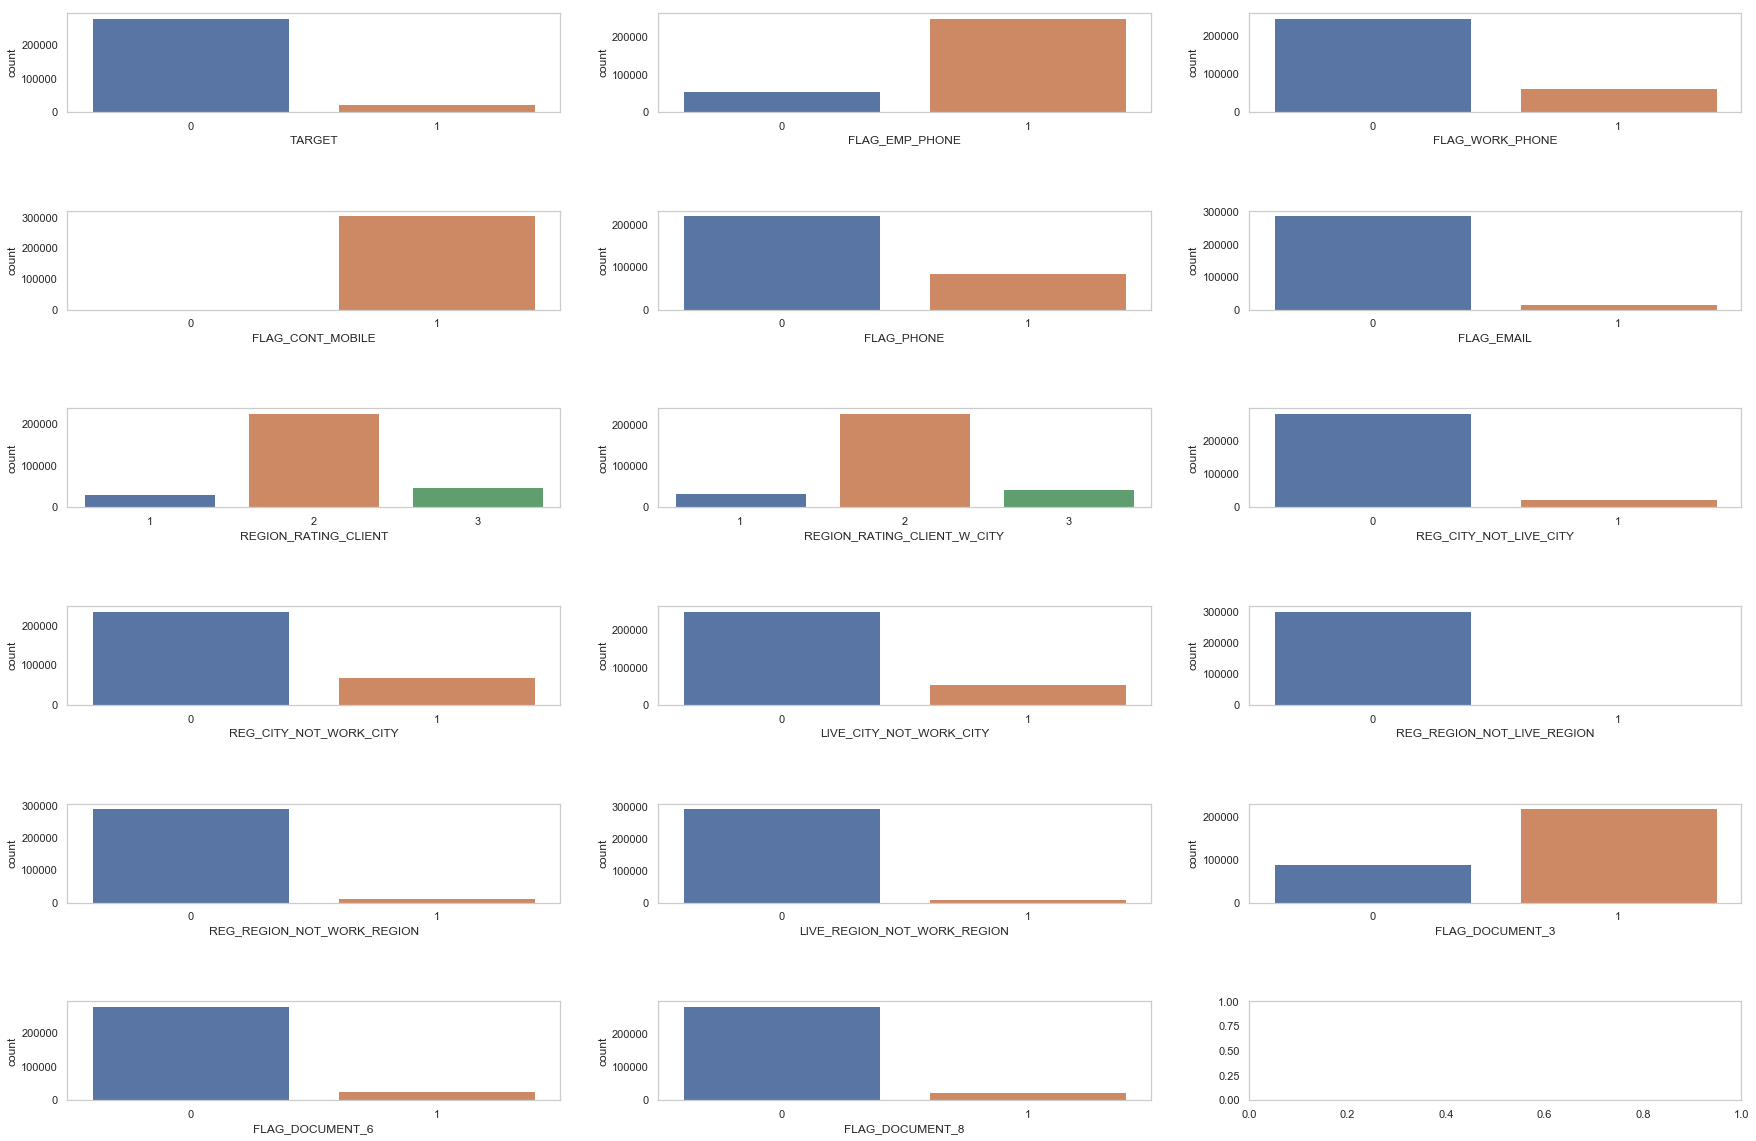

In [184]:
#Below are the continuos variable need to be considered as categorical
arr = ['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 
 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']

sns.set_style("whitegrid", {'axes.grid' : False})
continuous = app_data_cp[arr]
fig, ax = plt.subplots(6, 3, figsize=(30, 20))
plt.subplots_adjust(wspace=0.2,hspace=1)
for variable, subplot in zip(continuous, ax.flatten()):
    sns.countplot(app_data_cp[variable], ax=subplot)

Observation:

From above graph lets consider the one having some appreciable count of values in case of 0 and 1 and drop other columns

In [185]:
#Variable to consider
#TARGET,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,
#REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8

#Drop other columns
app_data_cp = app_data_cp.drop(['FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                               'LIVE_REGION_NOT_WORK_REGION','FLAG_EMAIL'],axis=1)

#Continuous Variables
continuous_var = ['TARGET','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8']


Change type to category for identified continuous variables

In [186]:
#Below are the continuos variable need to be considered as categorical so changing its type to category
type_to_category = ['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE','REGION_RATING_CLIENT', 
                    'REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                    'LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 
                    'FLAG_DOCUMENT_8']


app_data_cp[type_to_category] = app_data_cp[type_to_category].astype('category')

#categorical variables
app_data_categorical = app_data_cp.select_dtypes(include = ['O','category'])
#numerical variables
app_data_numerical = app_data_cp.select_dtypes(include = ['float64', 'int64'])

app_data_categorical

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           1         Cash loans           M            N               Y   
1           0         Cash loans           F            N               N   
2           0    Revolving loans           M            Y               Y   
3           0         Cash loans           F            N               Y   
4           0         Cash loans           M            N               Y   
5           0         Cash loans           M            N               Y   
6           0         Cash loans           F            Y               Y   
7           0         Cash loans           M            Y               Y   
8           0         Cash loans           F            N               Y   
9           0    Revolving loans           M            N               Y   
10          0         Cash loans           F            N               Y   
11          0         Cash loans           F            N               Y   
12          0         Cash loans           F            N               Y   
13          0         Cash loans           M            Y               N   
14          0         Cash loans           F            N               Y   
15          0         Cash loans           M            Y               Y   
16          0         Cash loans           M            N               N   
17          0    Revolving loans           F            N               Y   
18          0    Revolving loans           F            N               Y   
19          0         Cash loans           F            N               Y   
20          0    Revolving loans           M            Y               Y   
21          0         Cash loans           F            Y               Y   
22          0         Cash loans           F            N               N   
23          0         Cash loans           F            N               Y   
24          0         Cash loans           M            Y               N   
25          0         Cash loans           F            N               Y   
26          1         Cash loans           F            N               Y   
27          0         Cash loans           M            N               Y   
28          0         Cash loans           M            Y               Y   
29          0    Revolving loans           M            N               Y   
...       ...                ...         ...          ...             ...   
307481      1         Cash loans           M            N               Y   
307482      0         Cash loans           F            Y               Y   
307483      0         Cash loans           F            N               Y   
307484      0         Cash loans           F            Y               N   
307485      0    Revolving loans           F            N               Y   
307486      0         Cash loans           F            Y               Y   
307487      0         Cash loans           M            N               Y   
307488      0         Cash loans           F            N               N   
307489      1         Cash loans           F            N               Y   
307490      0         Cash loans           M            N               Y   
307491      0         Cash loans           M            Y               Y   
307492      0         Cash loans           M            Y               Y   
307493      0         Cash loans           F            N               Y   
307494      0         Cash loans           M            Y               N   
307495      0         Cash loans           M            Y               N   
307496      0    Revolving loans           F            N               N   
307497      0         Cash loans           F            Y               Y   
307498      0         Cash loans           M            Y               Y   
307499      0         Cash loans           F            N               Y   
307500      0         Cash loans           F            N               Y   
307

### 2. Categorical Variables

#### 2.1 Univariate Anaysis on Categorical and Continuous variables

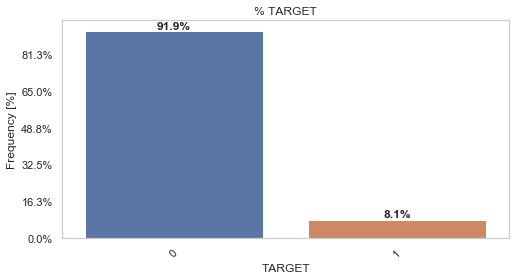

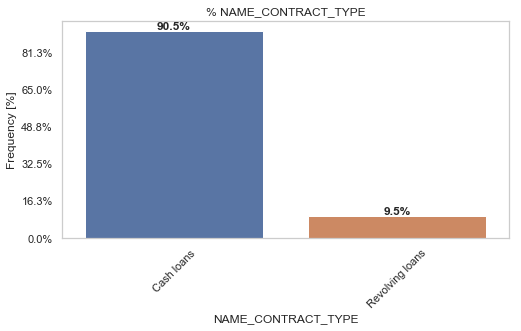

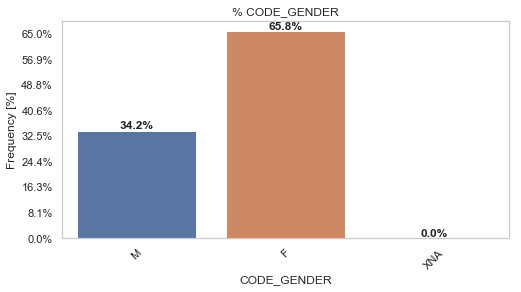

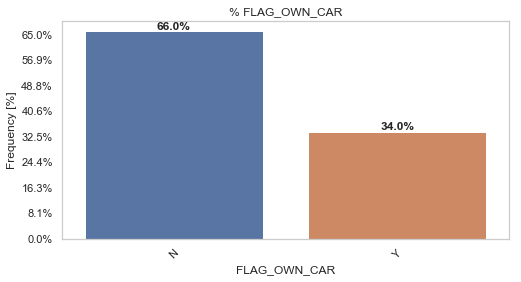

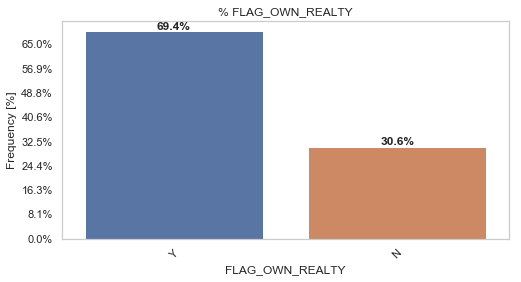

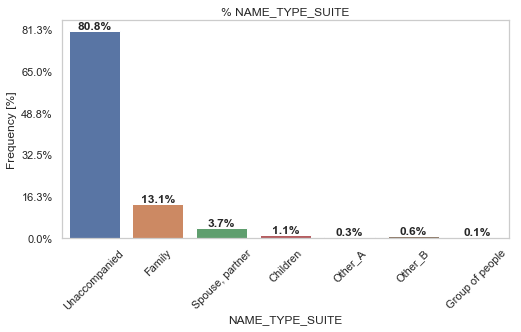

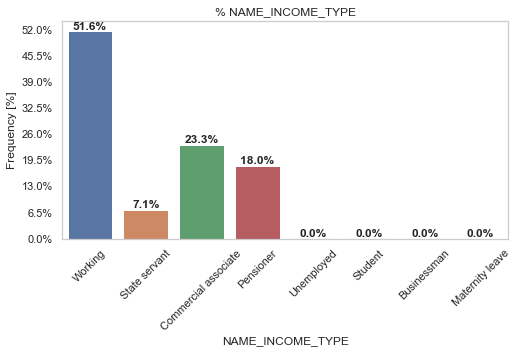

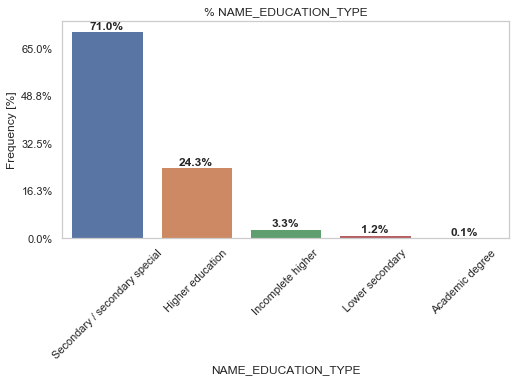

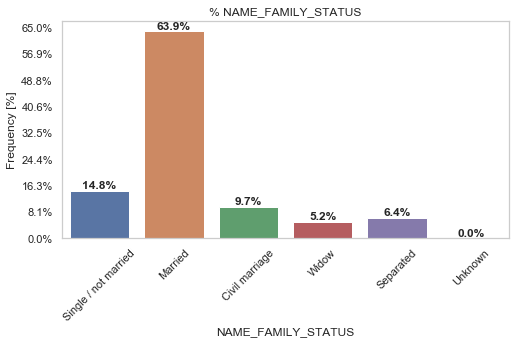

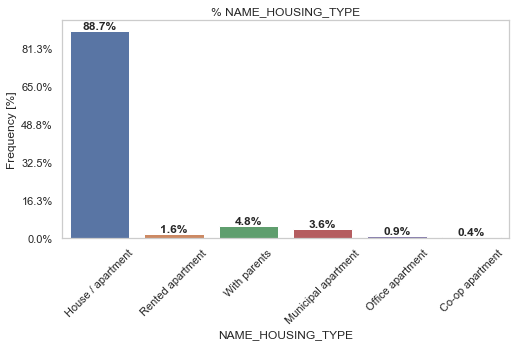

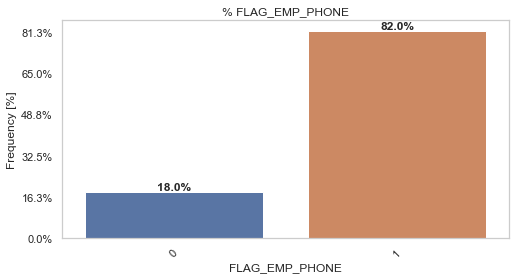

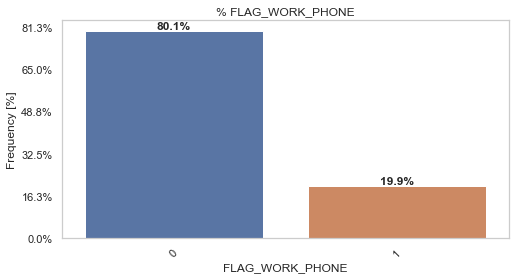

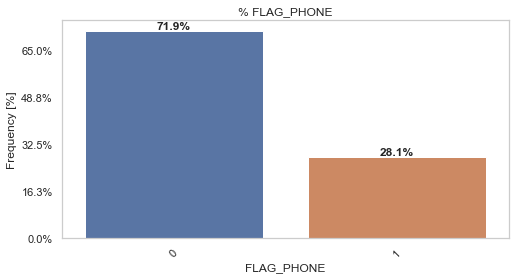

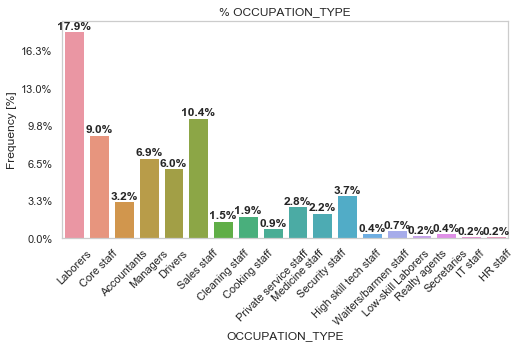

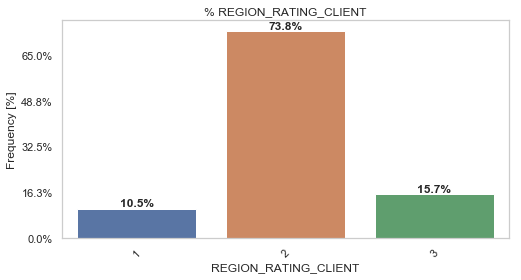

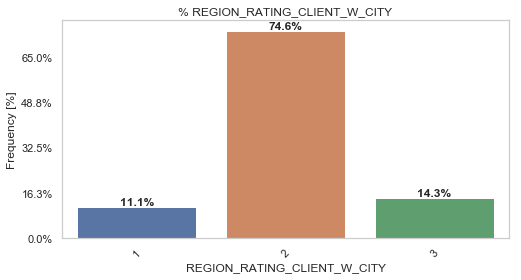

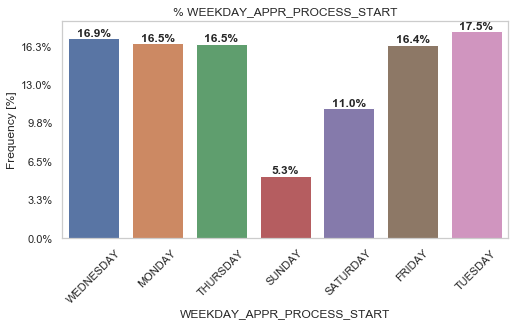

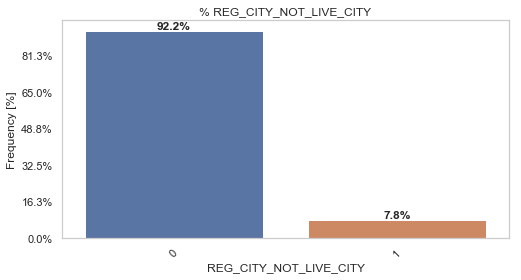

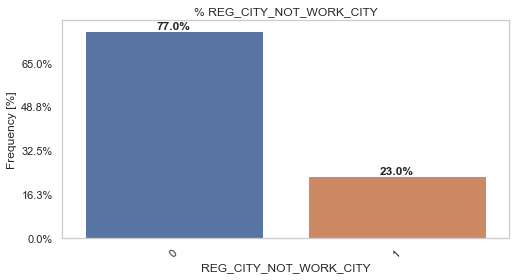

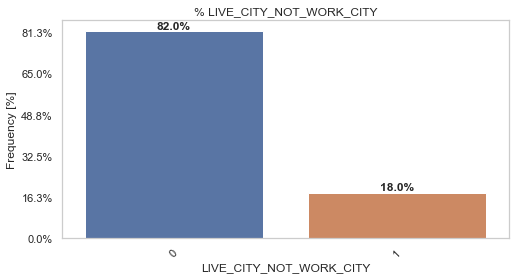

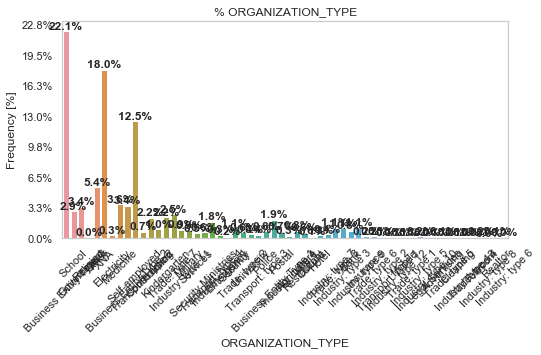

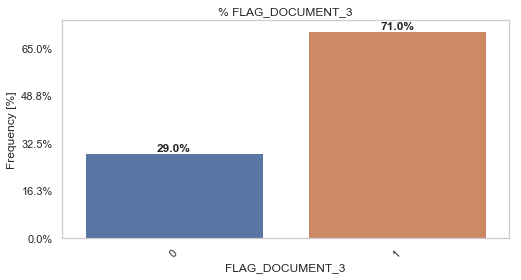

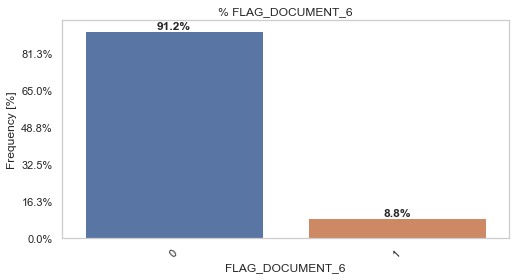

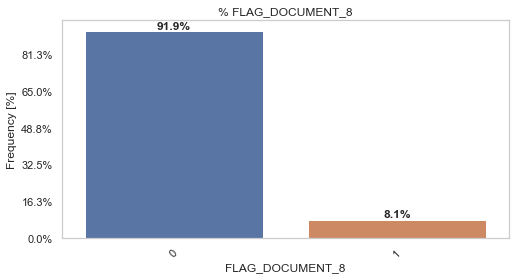

In [187]:
for c in app_data_categorical.columns:
    plot_variable(c)

Plot for Organization Type again

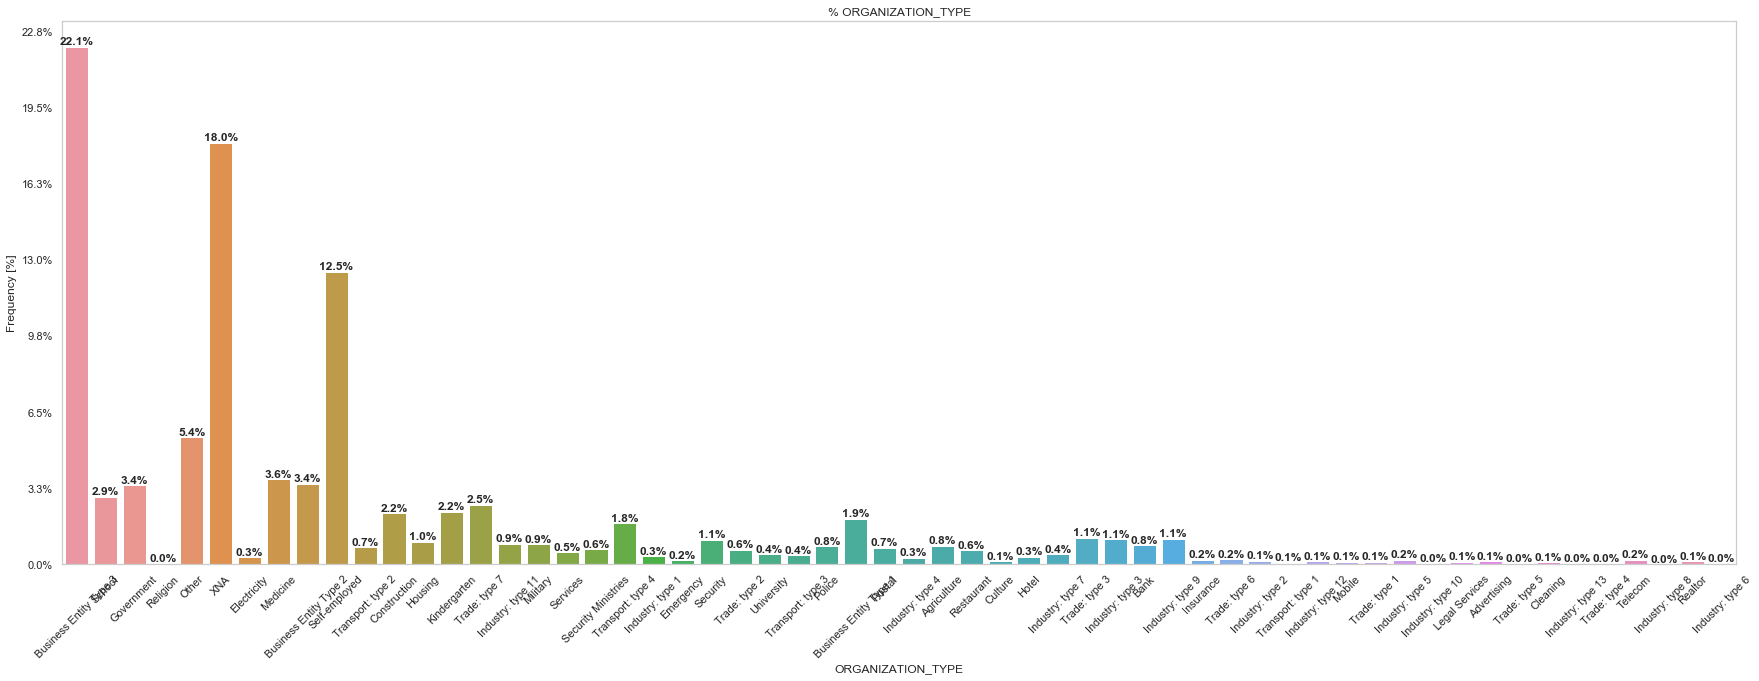

In [188]:
total = len(app_data_cp)
plt.figure(figsize=(30,10))
ax = sns.countplot(x='ORGANIZATION_TYPE', data=app_data_cp)
plt.title('% '+'ORGANIZATION_TYPE')
plt.xticks(rotation=45)
#plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
        ha='center', va='bottom',weight='bold') # set the alignment of the text

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

Inferences from Univariable Analysis of Categorical Variables:
1. NAME_CONTRACT_TYPE - Cash loans are higher then Revolving loans
2. CODE_GENDER - Female is more then Male
3. Flag_own_realy and Flag_own_car have approx equal percentage so correlated
4. NAME_TYPE_SUITE - Mostly customers visit bank accompained followed by with family
5. NAME_INCOME_TYPE - The type of income people getting loans are in order of Working,Commercial associate, Pensioner, state servant
6. NAME_EDUCATION_TYPE - Maximum people having secondary then Higher education
7. NAME_FAMILY_STATUS - Maximum people are married followed by single, civil marriage
8. NAME_HOUSING_TYPE - Majority of people live is house/apartment
9. OCCUPATION_TYPE - the type of occupation customer apply for loan are in order of Laborers,Sales Staff,Core staff,Manager,Drivers
10. WEEKDAY_APPR_PROCESS_START - Approx all weekdays have same percentage of procees start
11. FLAG_EMP_PHONE and FLAG_WORK_PHONE are inversely related as customer only give only 1 from two
12. FLAG_PHONE - Maximun people didnt give this phone
13. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY are same - Maximum customer lives in medium costly then lower costly 
area and last prefer to live at centre of city which must be costly areas
																	
14. REG_CITY_NOT_LIVE_CITY - Majority of custmer permanent address not match with current address
15. REG_CITY_NOT_LIVE_CITY - Majority customer working in other city but one fourth are living and working in same city
16. LIVE_CITY_NOT_WORK_CITY is related with NAME_HOUSING_TYPE  - Majority customers do not live in the company as shows in NAME_HOUSING_TYPE is apartment in maximum values same
17. FLAG_DOCUMENT_6 and FLAG_DOCUMENT_8 can be related as approx same percentage of people have not given this document
18. ORGANIZATION_TYPE - Customer who applied for loans mostly from organization as in order - Business Type 3, NA,Type 2, other,MEdicine, Electricity,School


### 2.2 Segmented Anaysis on Categorical and Continuous variables

In [189]:
#Function to plot segmented variable based on Target=0 and Target=1

def segmented_variable(col):
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(wspace=0.5,hspace=1)
    plt.figure(1)
    # Create a subplot with 1 row, 2 columns 

    # create the first subplot in figure 1 
    plt.subplot(121)  
    plt.title("Defaulters")
    total = len(app_data_cp[app_data_cp['TARGET'] == 1])
    #plt.figure(figsize=(12,8))
    order = app_data_cp[col].value_counts(ascending=False).index
    ax = sns.countplot(x=col, data=app_data_cp[app_data_cp['TARGET'] == 1],order=order)
    plt.xticks(rotation=45)
    plt.xlabel(' '+col)
    plt.ylabel('Frequency [%] '+col)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    #plt.xlabel(' '+c, fontsize=8)


    # create the second subplot in figure 1
    plt.subplot(122) 
    plt.title("No Defaulters")
    total1 = len(app_data_cp[app_data_cp['TARGET'] == 0])
    #total = len(app_data_cp)
    #plt.figure(figsize=(12,8))
    ax = sns.countplot(x=col, data=app_data_cp[app_data_cp['TARGET'] == 0],order=order)
    plt.xticks(rotation=45)
    plt.xlabel(' '+col)
    plt.ylabel('Frequency [%] '+col)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total1), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total1))
    #plt.xlabel(' '+c, fontsize=8)
    plt.show()

Plot graph for categorical variable based on Target=1 Defaulters and Target=0 No Defaulter

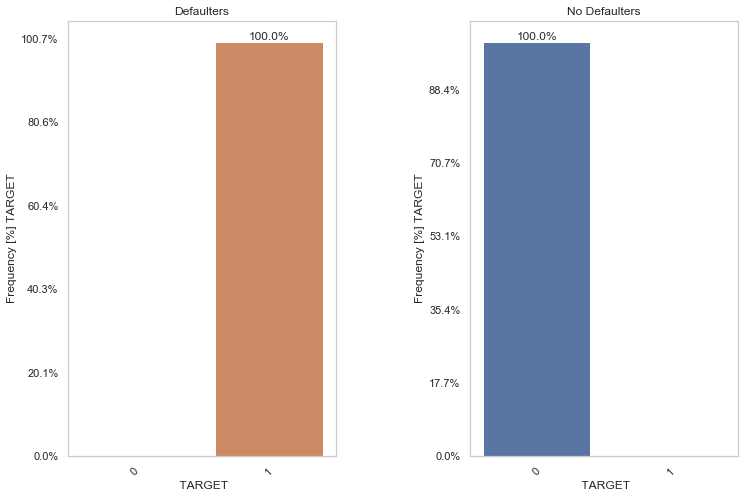

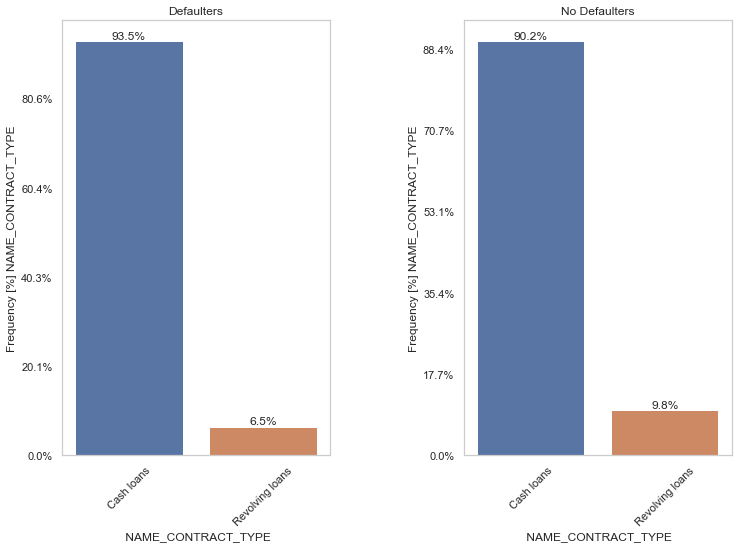

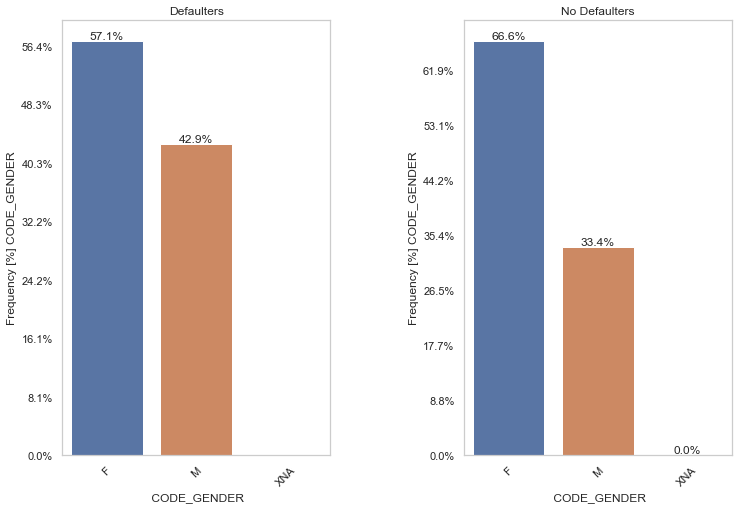

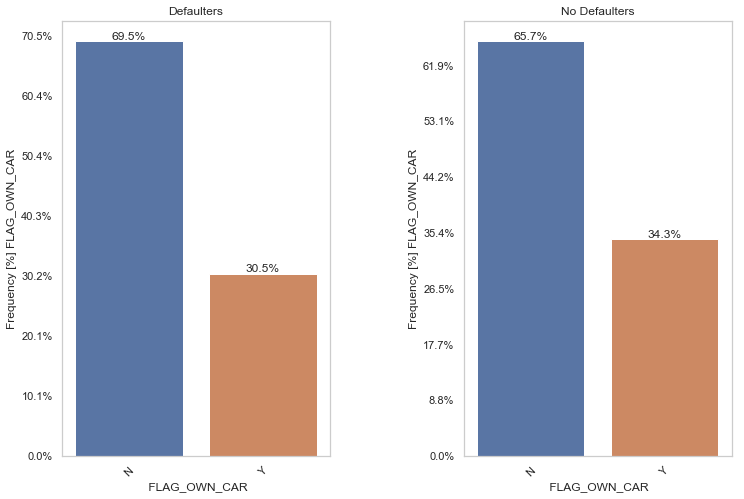

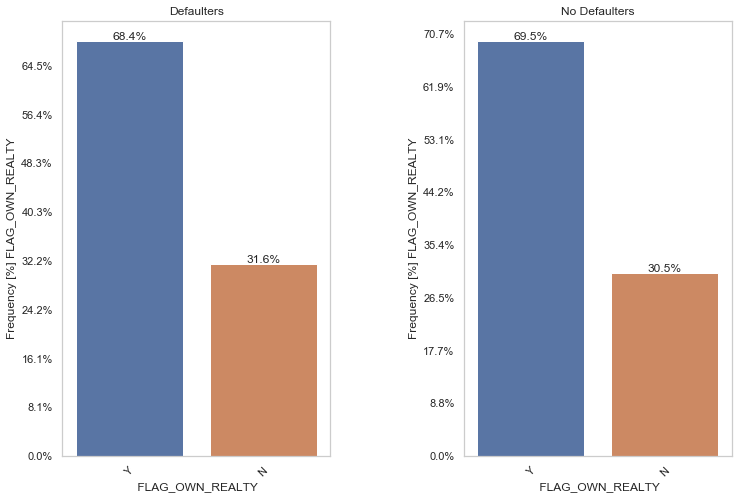

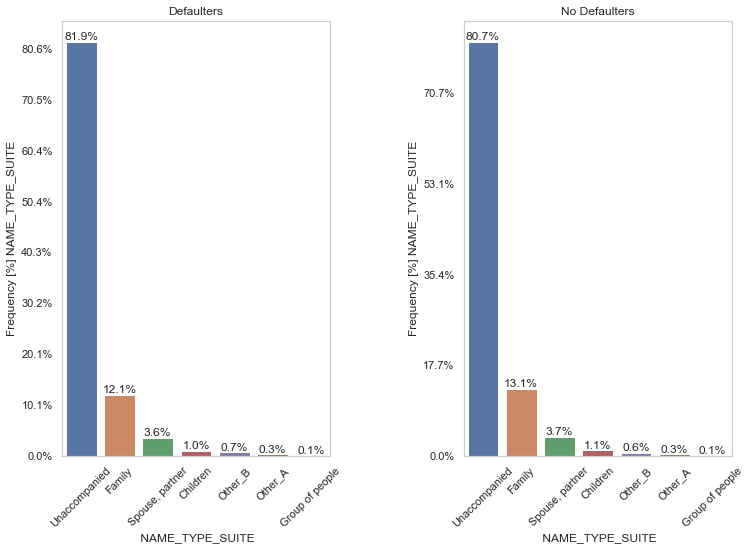

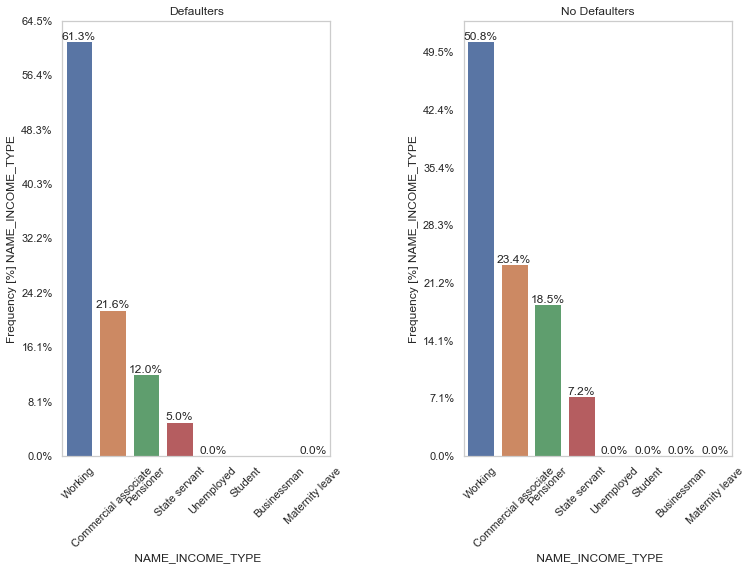

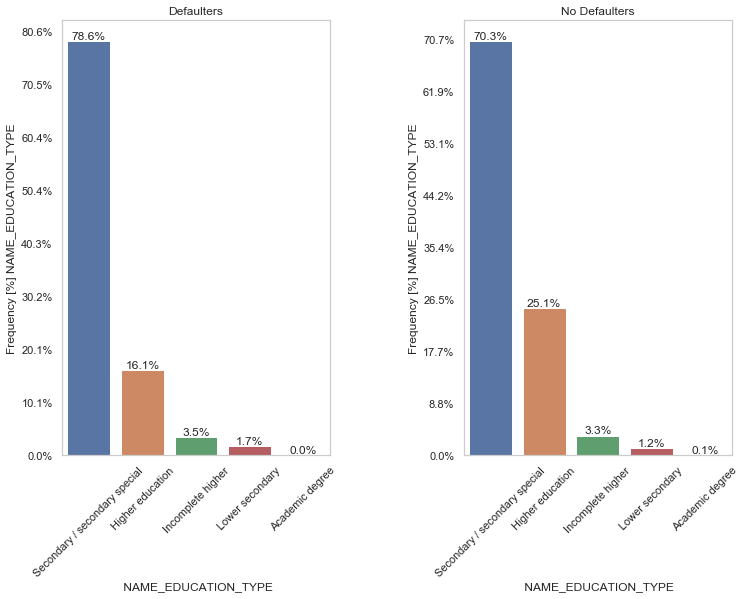

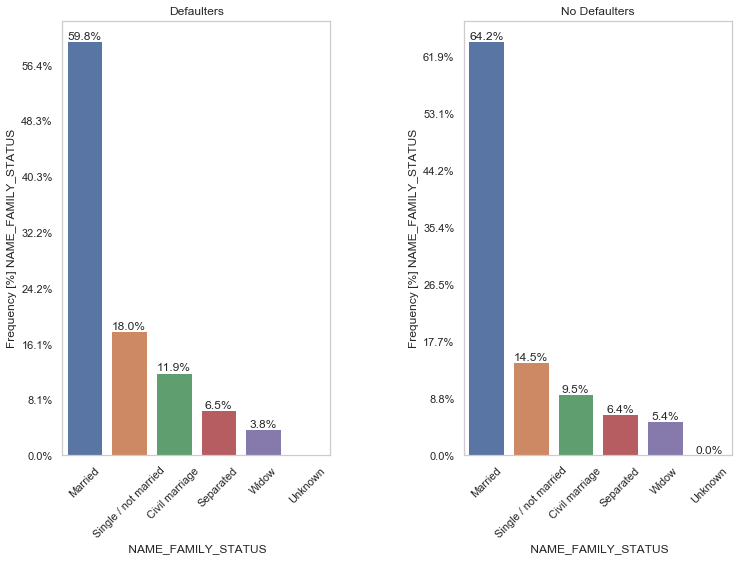

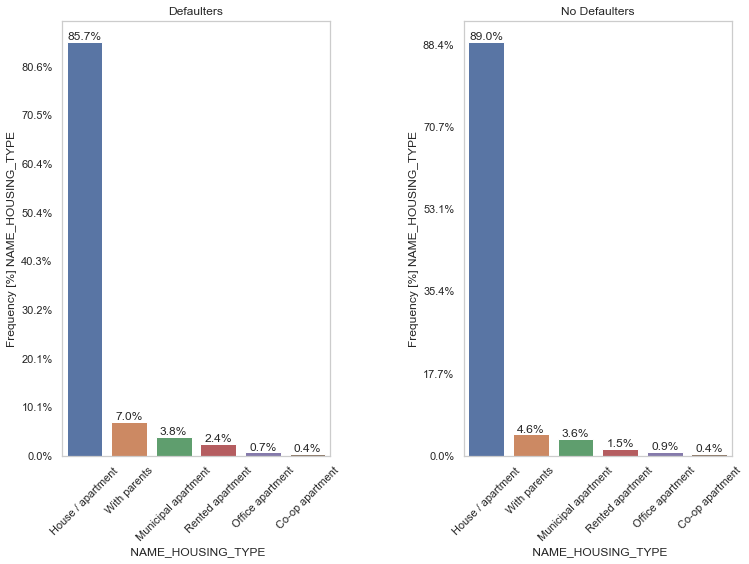

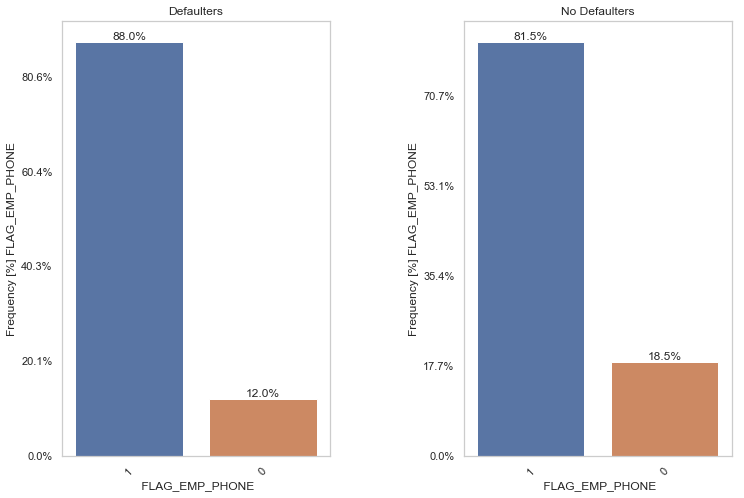

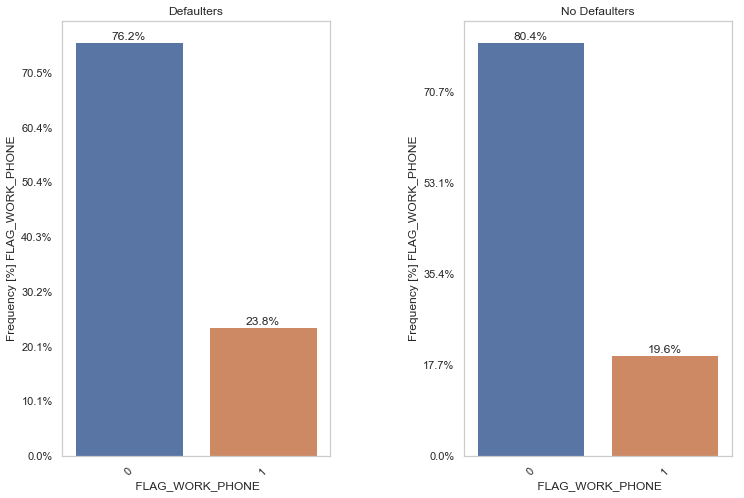

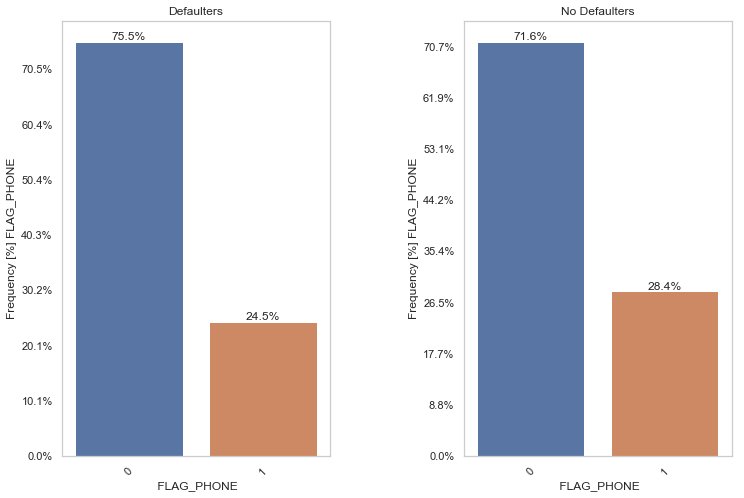

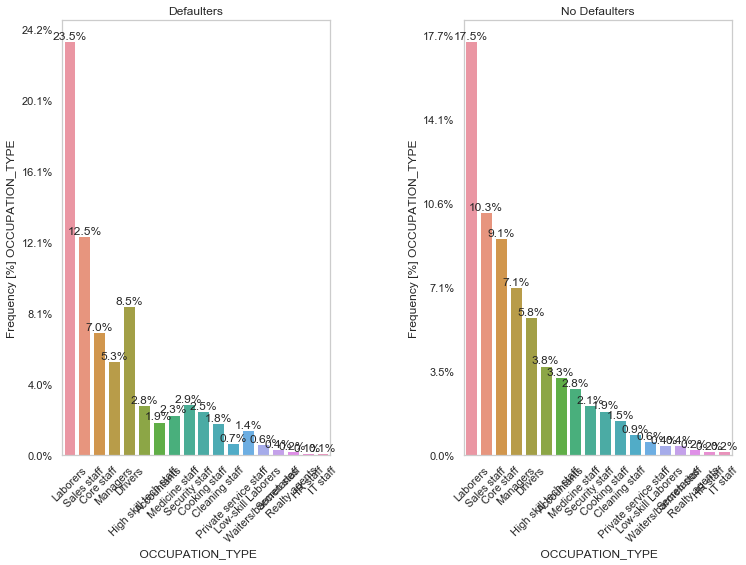

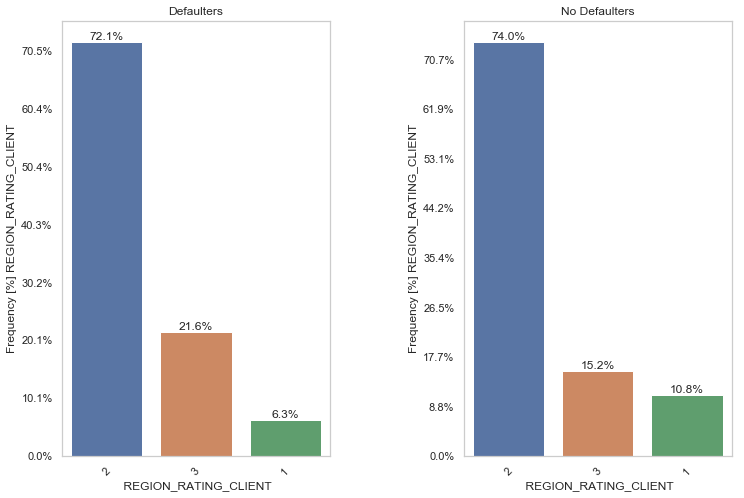

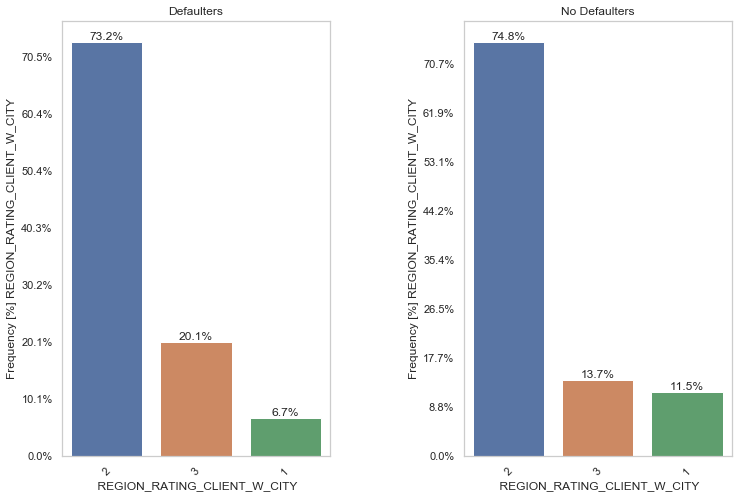

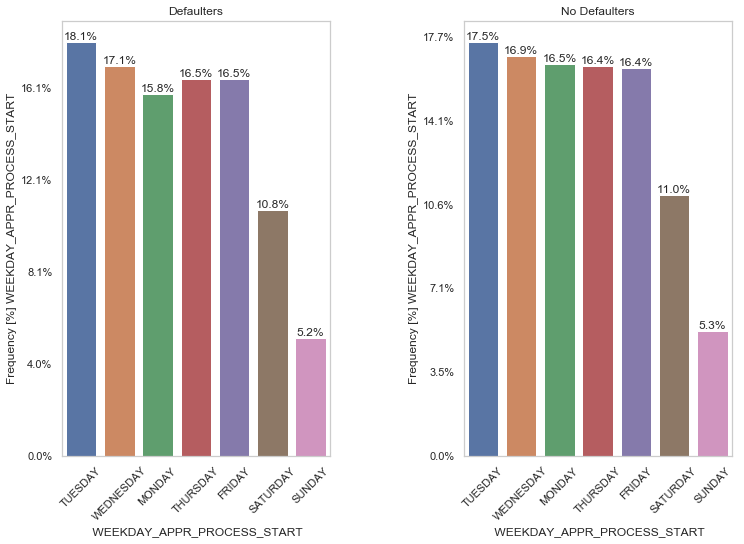

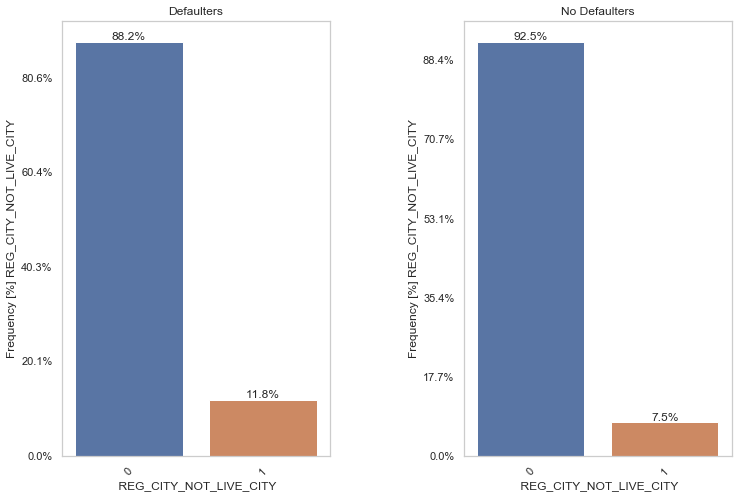

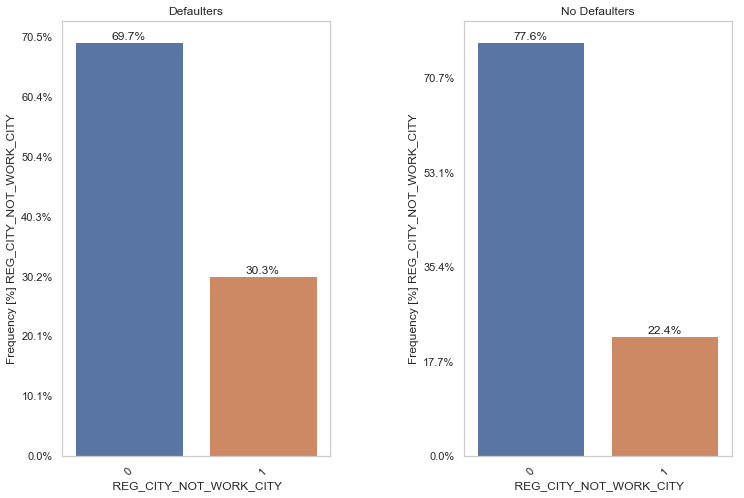

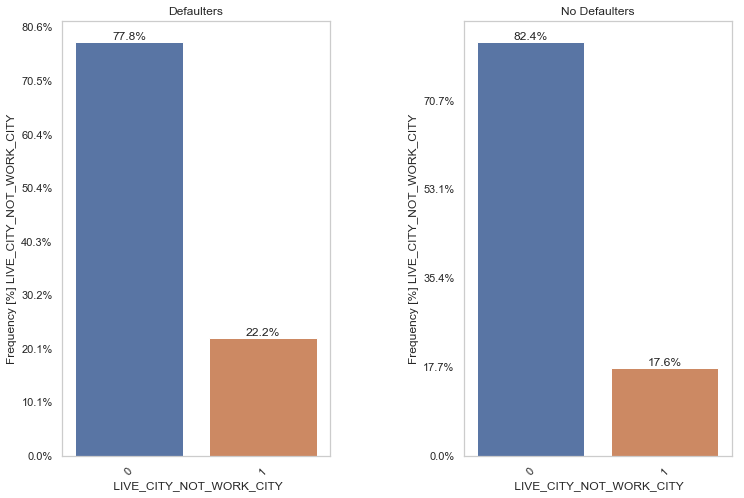

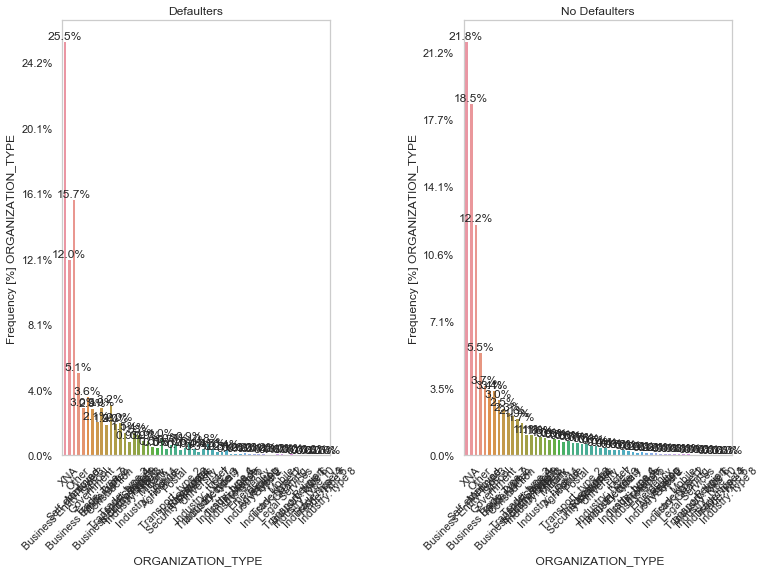

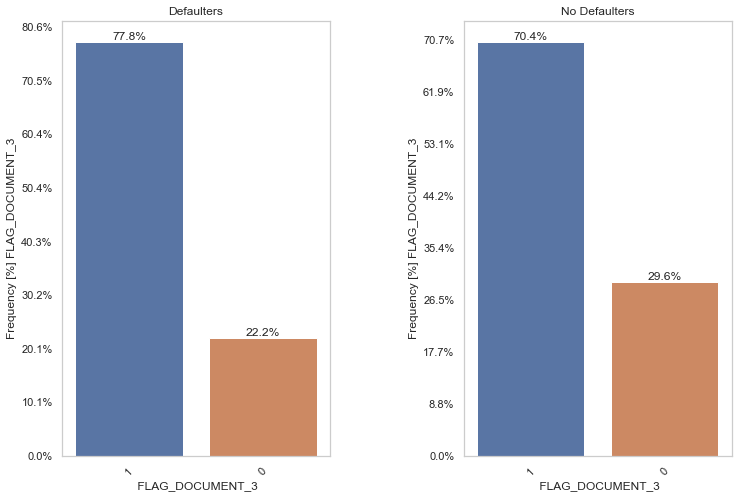

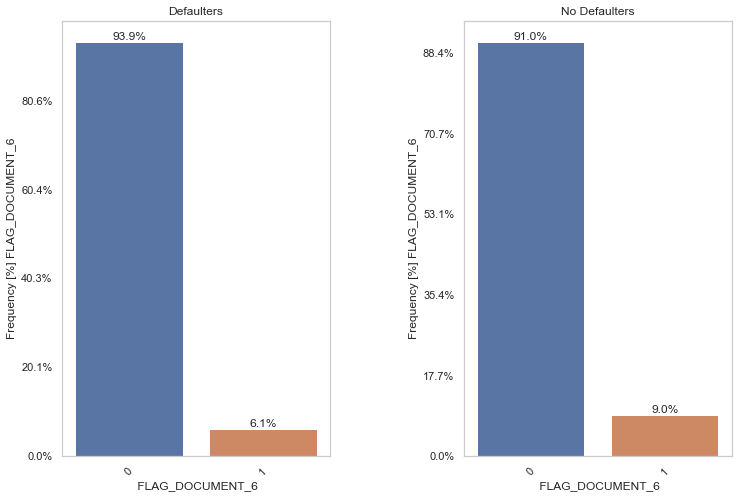

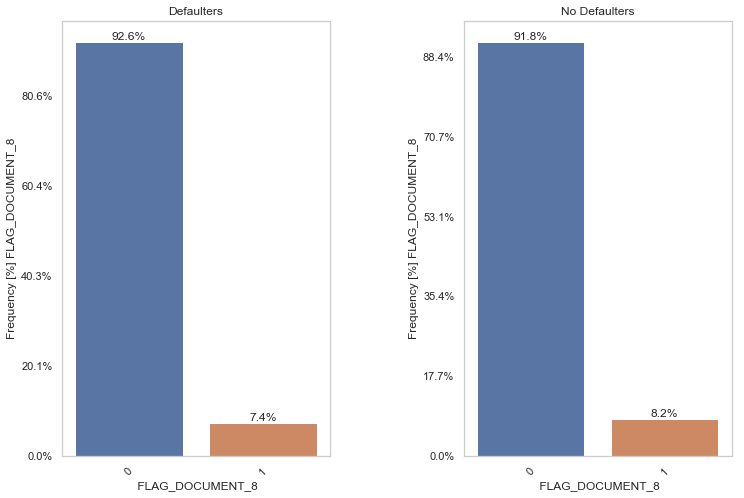

In [190]:
for c in app_data_categorical.columns:
    segmented_variable(c)

Plot Graph for ORGANIZATION_TYPE as not clear enough

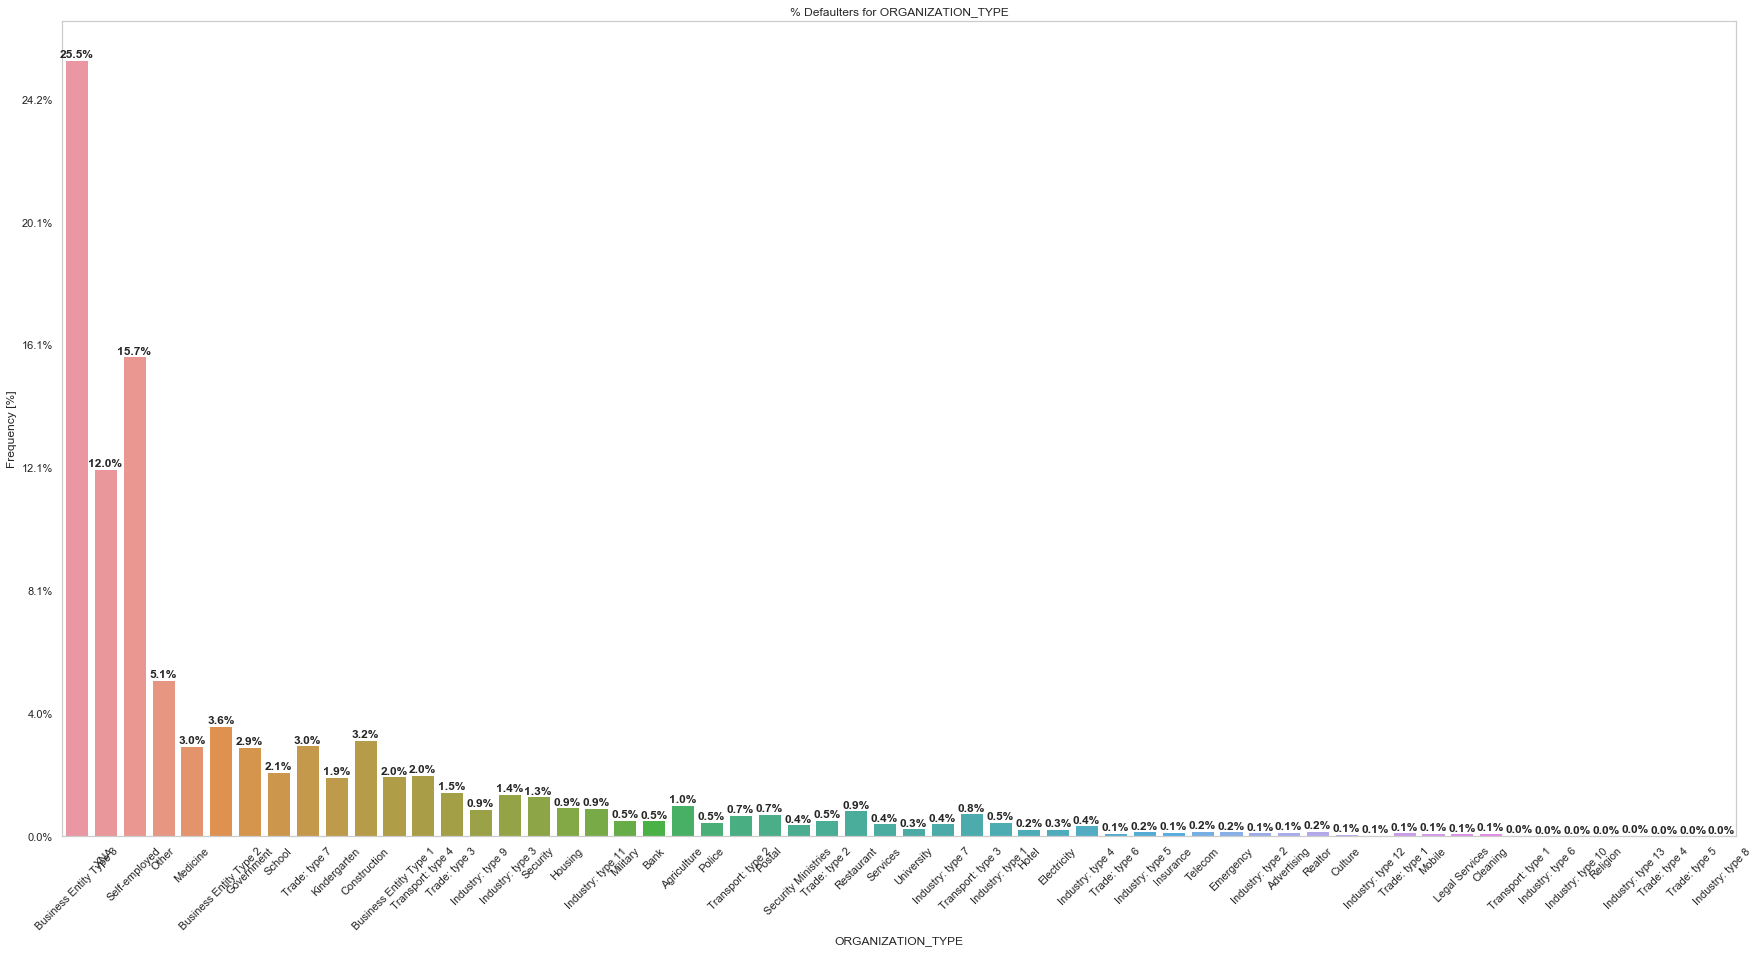

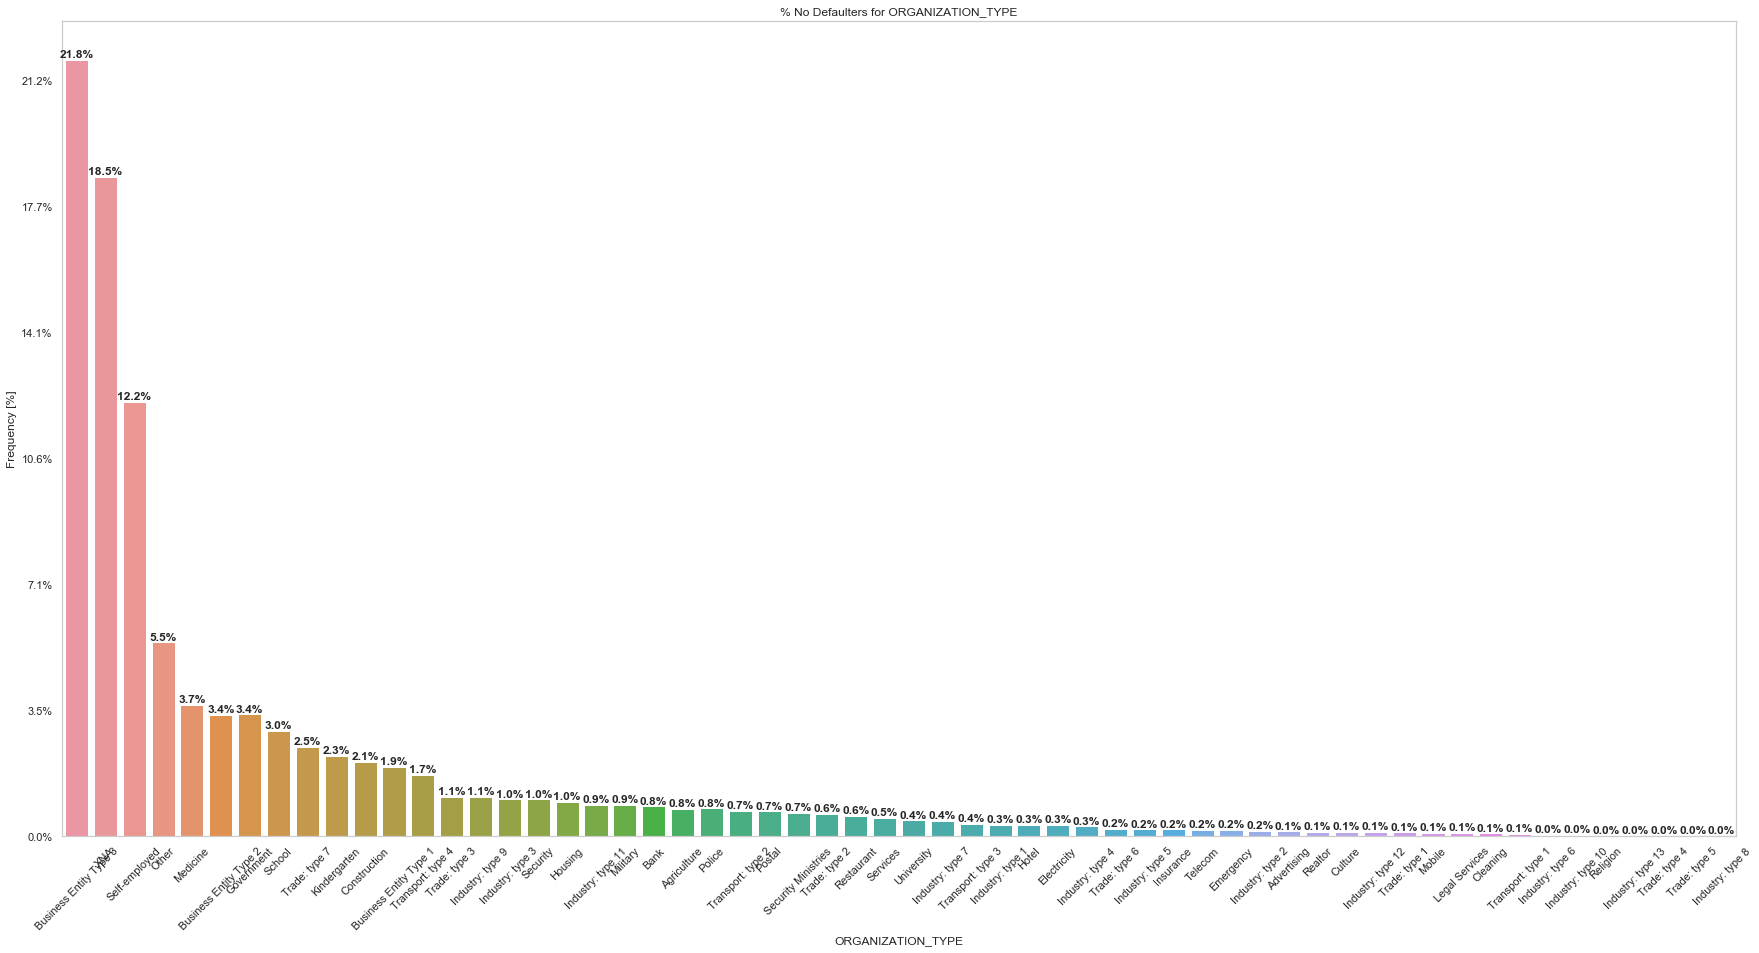

In [191]:
#Plot Graph for ORGANIZATION_TYPE
total = len(app_data_cp[app_data_cp['TARGET'] == 1])
plt.figure(figsize=(30,15))
order = app_data_cp['ORGANIZATION_TYPE'].value_counts(ascending=False).index
ax = sns.countplot(x='ORGANIZATION_TYPE', data=app_data_cp[app_data_cp['TARGET'] == 1],order=order)
plt.title('% Defaulters for '+'ORGANIZATION_TYPE')
plt.xticks(rotation=45)
#plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
        ha='center', va='bottom',weight='bold') # set the alignment of the text

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.figure(figsize=(30,15))
total1 = len(app_data_cp[app_data_cp['TARGET'] == 0])
ax = sns.countplot(x='ORGANIZATION_TYPE', data=app_data_cp[app_data_cp['TARGET'] == 0],order=order)
plt.title('% No Defaulters for '+'ORGANIZATION_TYPE')
plt.xticks(rotation=45)
#plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total1), (x.mean(), y), 
        ha='center', va='bottom',weight='bold') # set the alignment of the text

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total1))

Inferences:

1. CODE_GENDER : For Defaulters loan has been given more to MALE as compare to no Defaulters
2. INCOME_TYPE: For Defaulters loan given to pensioners are less as compare total1
3. NAME_EDUCATION_TYPE : As compare to no defaulters more loan has been distrbuted to secondary and less to Higher Education
4. NAME_FAMILY_STATUS : Less loan given to defaulters as compare to no defaulter for Married people, more loan distrbuted to single as compare to no defaulter 
5. NAME_HOUSING_TYPE : More loans given to customers living with parents in defaulter
6. OCCUPATION_TYPE :  More loans given to customers who are Drivers in defaulter
7. REGION_RATING_CLIENT : for region 3 the data is more in defaulter, It is relationshi with REGION_RATING_W_CLIENT
8. REG_CITY_NOT_WORK_CITY : More loans given to customers whose client's permanent address does not match work address in defaulter
9. ORGANIZATION_TYPE : More loans has been given to customers who are self employed as compare to no Defaulters

## 2. Numeric Variables

### 2.1 Univariate Analysis on Numeric Variables

#### Plot the histogram

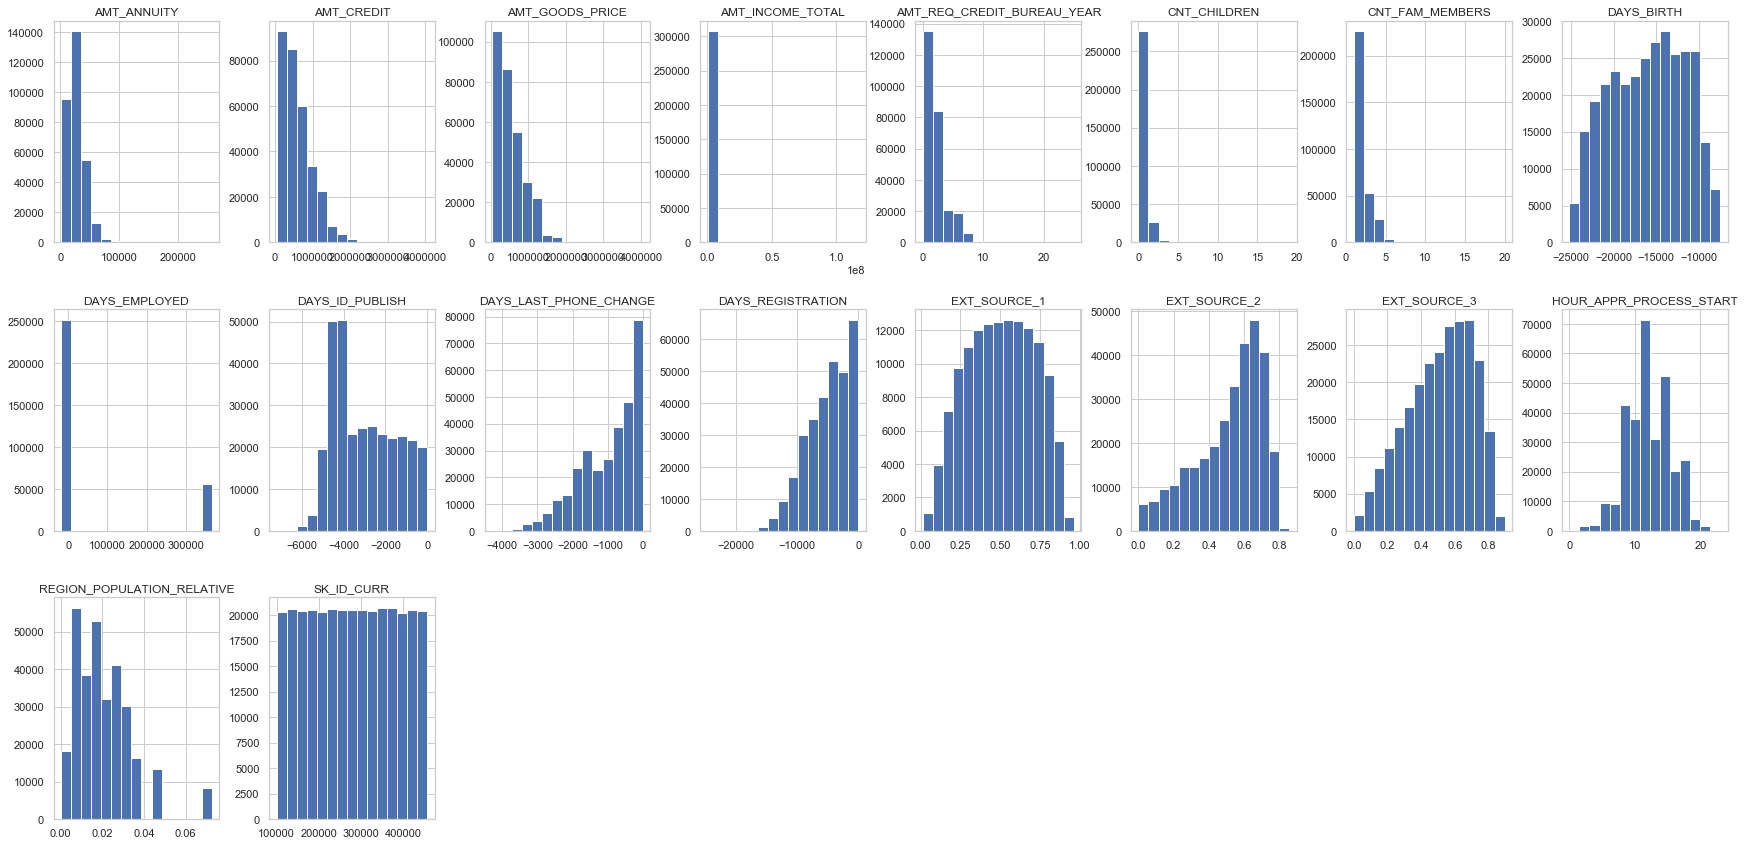

In [192]:
app_data_numerical.hist(bins=15, figsize=(30, 20), layout=(4, 8));

Observations:
1. columns have negative value
2. columns are having outliers
3. Highly skewed on left

Plot boxplot and see the distrbution

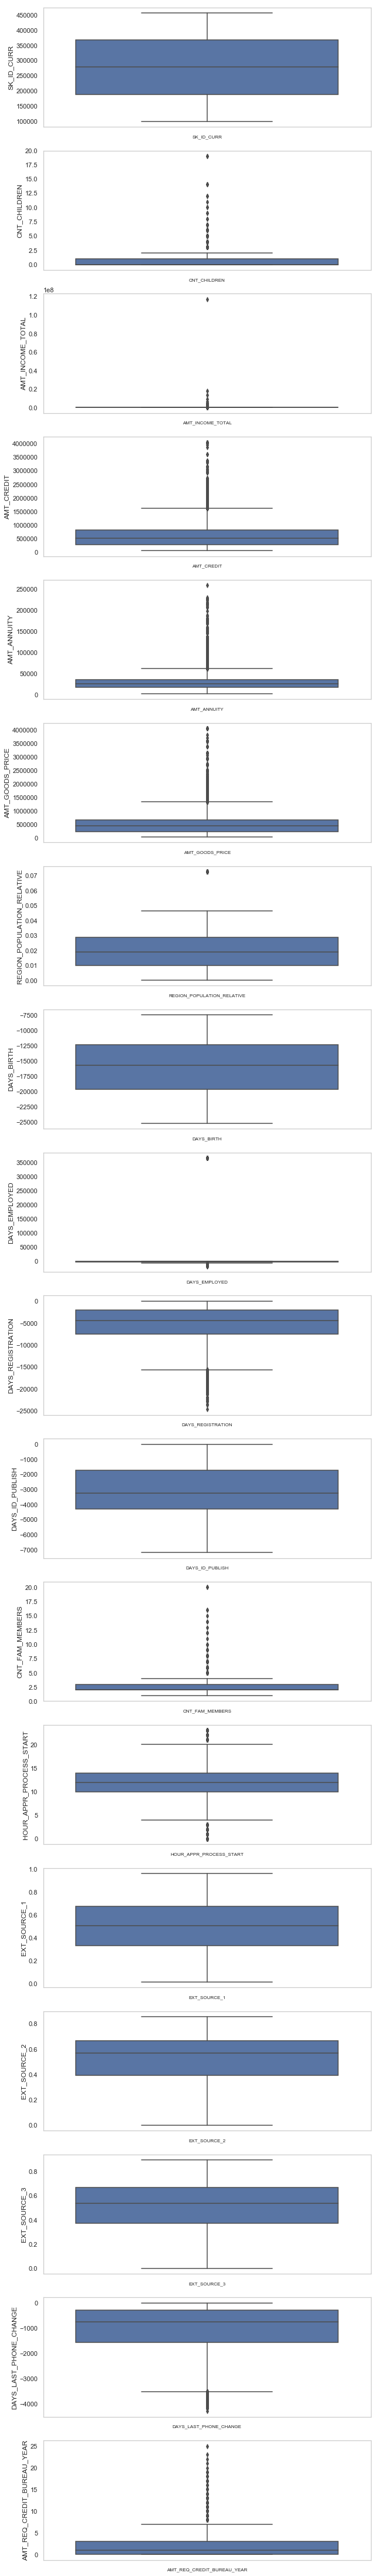

In [193]:
col_names= app_data_numerical.columns

fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=app_data_numerical[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

It can be infer that below variables have outliers
1. CNT_CHILDERN
2. AMT_INCOME_TOTAL
3. AMT_CREDIT
4. AMT_ANNUITY
5. DAYS_EMPLOYED
6. CNT_FAM_MEMBERS
7. HOUR_APPR_PROCESS_START
8. DAYS_LAST_PHONE_CHANGE
9. REGION_POPULATION_RELATIVE
10. AMT_REQ_CREDIT_BUREAU_YEAR
11. DAYS_REGISTRATION

Variable having negative value that needs to be treated
#DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH

In [194]:
#DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
#Convert all the negative columns into positive by changing to year

#There is column days_birth can be converted into years
app_data_cp['DAYS_BIRTH'] = abs(round(app_data_cp['DAYS_BIRTH']/365)).astype(int)
#age = age.astype(int)
app_data_cp['DAYS_BIRTH']

#In DAYS_EMPLOYED column there is data error entry of 365243 which means 1000 years and 34 weeks so assumption
# of error in data and taking it as 34 weeks which means 238 days
#Replacing 365243 with -238 (238 is any random minimum value does not impact on data distribution)
app_data_cp.DAYS_EMPLOYED.replace([365243, -238], inplace=True)
app_data_cp['DAYS_EMPLOYED'] = abs(round(app_data_cp['DAYS_EMPLOYED']/365,2))

#DAYS_REGISTRATION convert into years
app_data_cp['DAYS_REGISTRATION'] = abs(round(app_data_cp['DAYS_REGISTRATION']/365,2))

#DAYS_ID_PUBLISH convert into years
app_data_cp['DAYS_ID_PUBLISH'] = abs(round(app_data_cp['DAYS_ID_PUBLISH']/365,2))

#DAYS_ID_PUBLISH convert into years
app_data_cp['DAYS_LAST_PHONE_CHANGE'] = abs(round(app_data_cp['DAYS_LAST_PHONE_CHANGE']/365,1))


#### Derive column total years to repay loan can be created by use of AMT_CREDIT and AMT_Annuity
app_data_cp['TOTAL_YEARS_REPAY_LOAN']= abs(round(app_data_cp['AMT_CREDIT']/app_data_cp['AMT_ANNUITY'],1))
app_data_cp['TOTAL_YEARS_REPAY_LOAN']

#Age and total month to repay is highly correlated and important factor to decide customer defaulter or not

0         16.5
1         36.2
2         20.0
3         10.5
4         23.5
5         17.8
6         37.8
7         36.4
8         30.1
9         20.0
10        30.8
11        13.9
12        13.7
13        31.7
14        23.6
15        14.9
16        19.5
17        20.0
18        20.0
19        31.0
20        20.0
21        30.2
22        15.3
23        10.1
24        19.5
25        20.3
26        36.2
27        13.7
28        13.7
29        20.0
          ... 
307481    14.9
307482    14.3
307483    15.0
307484    15.3
307485    20.0
307486    19.4
307487    34.1
307488    10.1
307489    22.6
307490    14.8
307491    34.2
307492    36.3
307493    25.1
307494    10.2
307495    34.0
307496    20.0
307497    22.5
307498    25.2
307499    17.7
307500    36.2
307501    22.7
307502    21.2
307503    19.4
307504    20.6
307505    10.2
307506     9.2
307507    22.5
307508    22.6
307509    18.3
307510    13.7
Name: TOTAL_YEARS_REPAY_LOAN, Length: 307511, dtype: float64

Note: Changing all the values from days to years but using the default name only(No change in column name only)

### Plot scatter for more insights on outliers

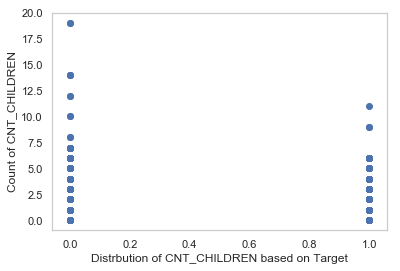

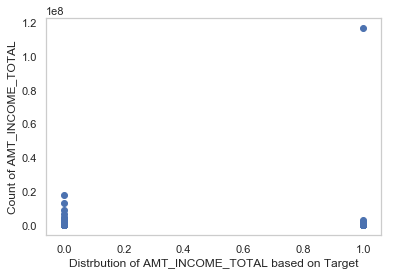

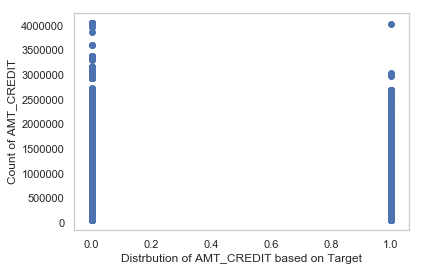

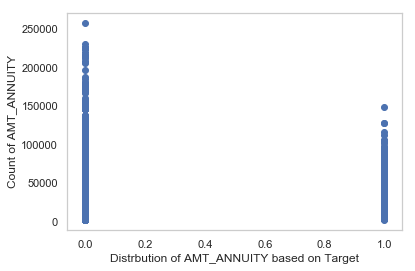

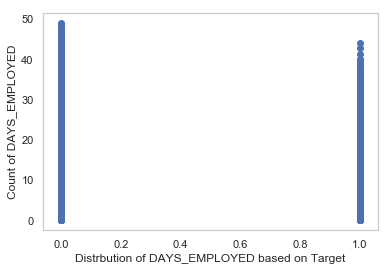

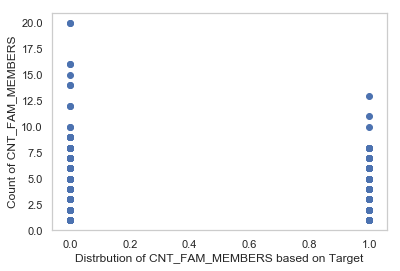

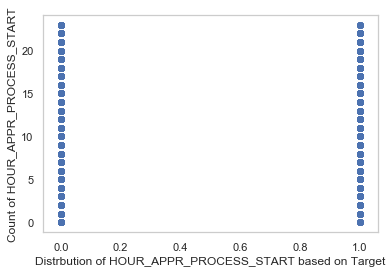

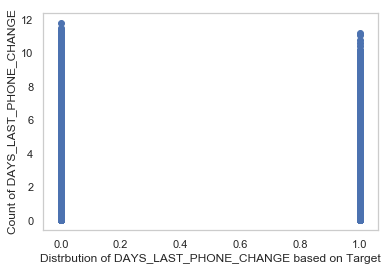

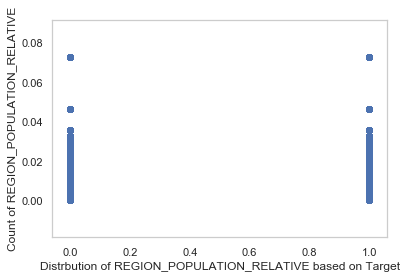

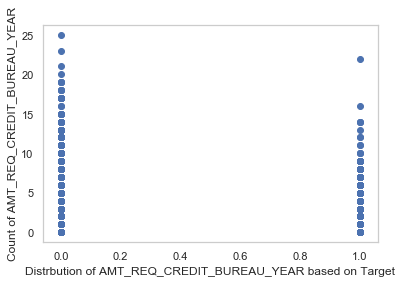

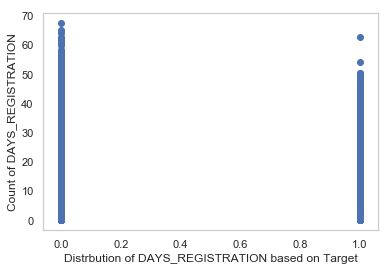

In [195]:
arr = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START',
      'DAYS_LAST_PHONE_CHANGE','REGION_POPULATION_RELATIVE','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_REGISTRATION']

for c in arr:
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(app_data_cp['TARGET'], app_data_cp[c])
    ax.set_ylabel('Count of '+c)
    ax.set_xlabel('Distrbution of '+c+' based on Target')
    plt.show()

Inferences: Below columns which seems relevant and having outliers
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. REGION_POPULATION_RELATIVE
5. DAYS_EMPLOYED
6. AMT_REQ_CREDIT_BUREAU_YEAR

#### Assumption : In DAYS_EMPLOYED there is data entry error of 365243 which is replaced by assumption of 238 days

Plot the distrbution by showing removed outliers

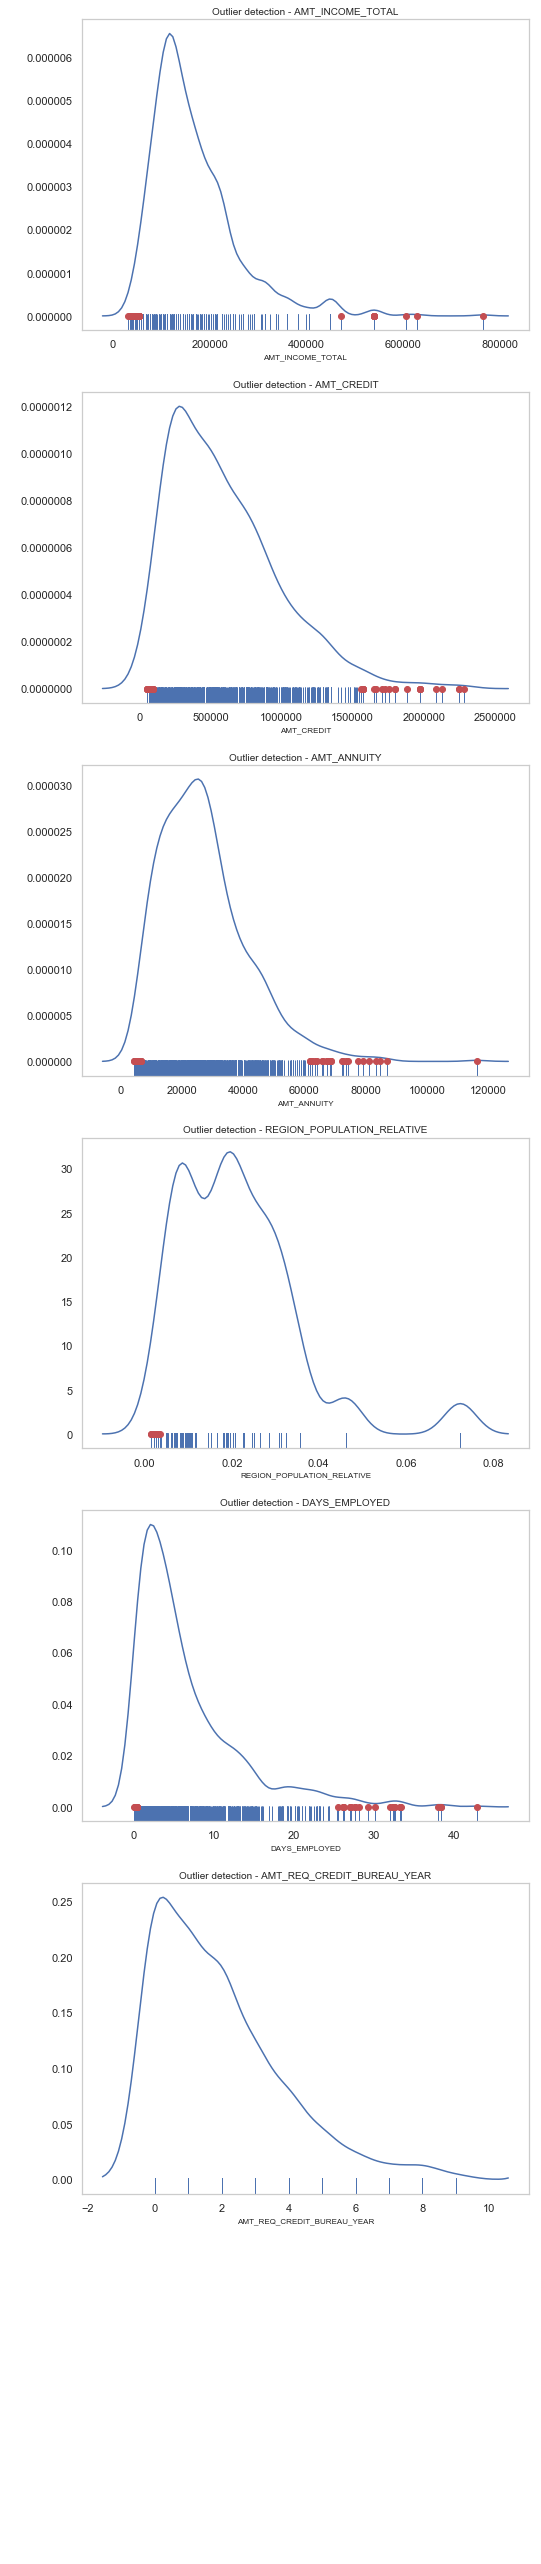

In [196]:
# Remove the outliers
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED',
             'AMT_REQ_CREDIT_BUREAU_YEAR']

ig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = app_data_cp[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Inference:
The values marked with a dot below in the x-axis of the graph are the ones that are removed from the column based on the set threshold percentile (95 in our case), and is also the default value when it comes to percentile-based outlier removal

### 2.2 Segmented Analysis for numerical variables

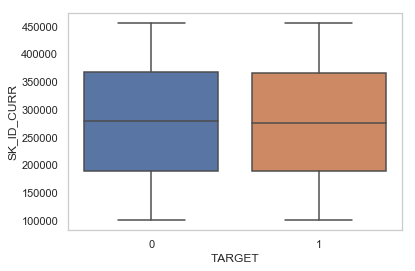

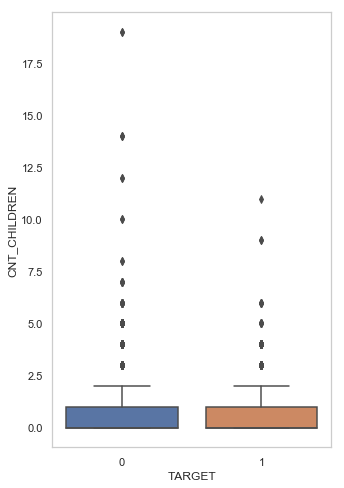

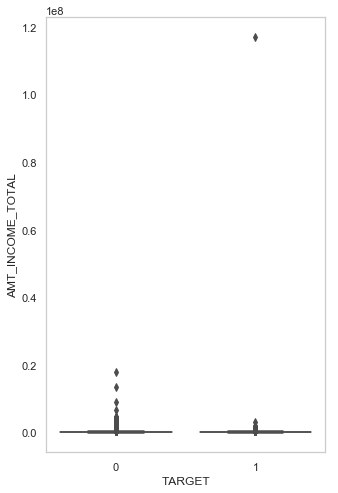

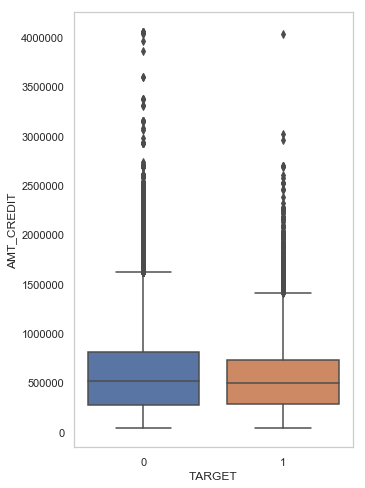

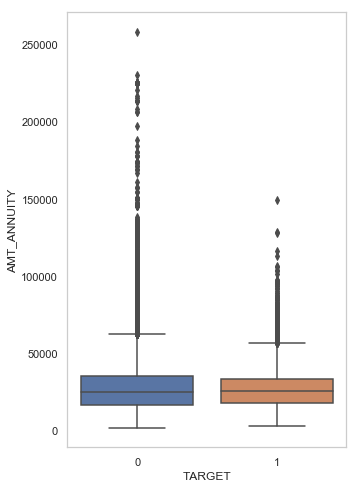

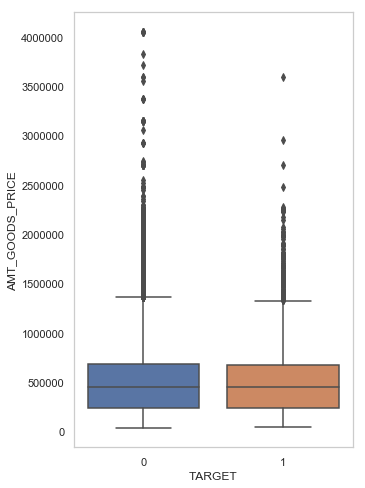

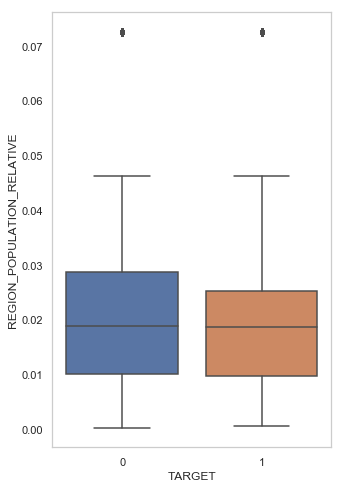

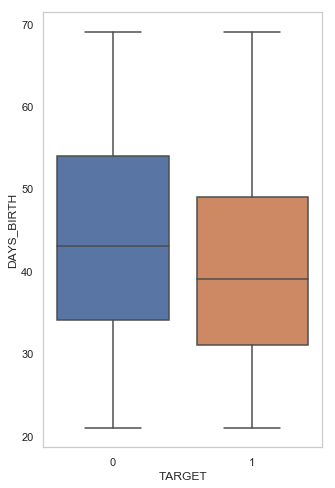

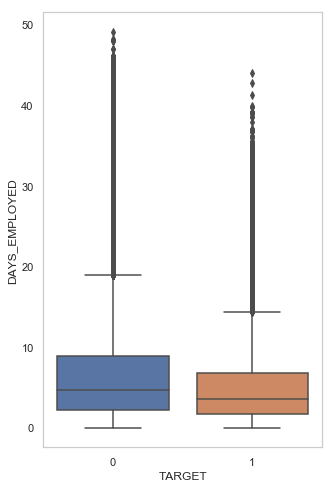

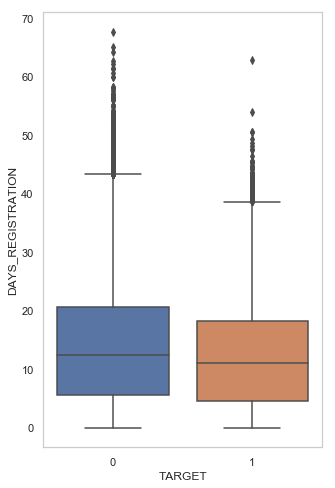

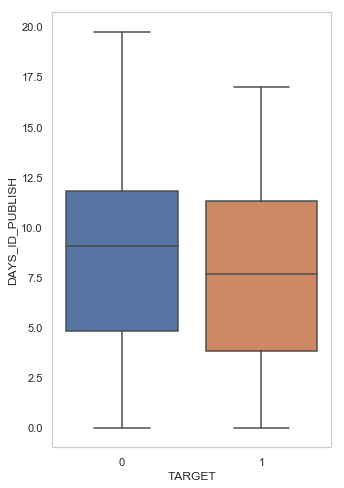

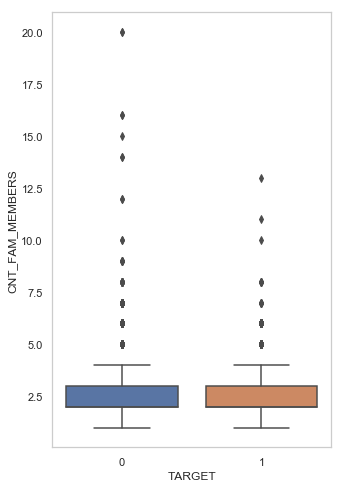

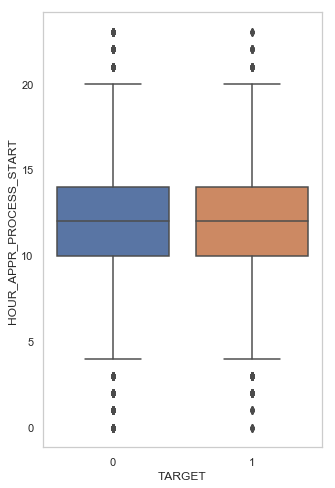

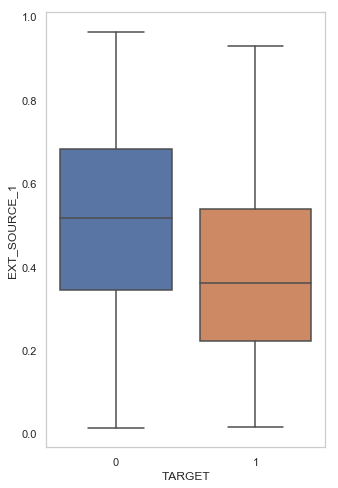

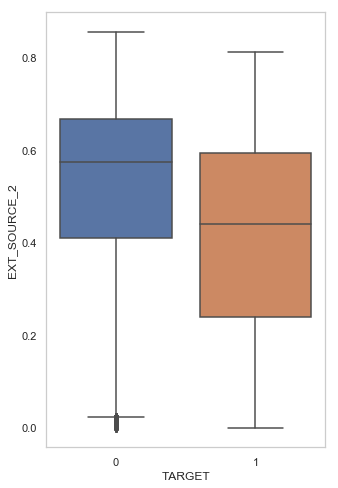

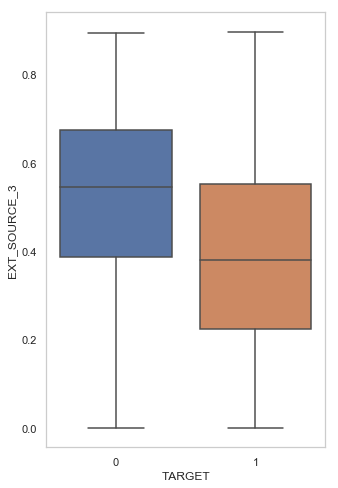

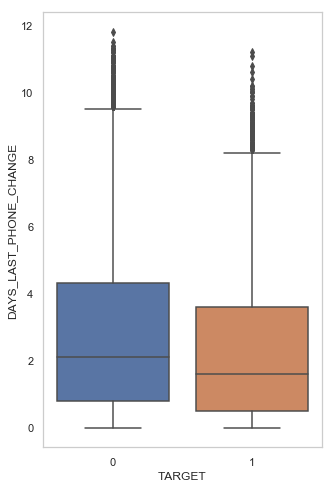

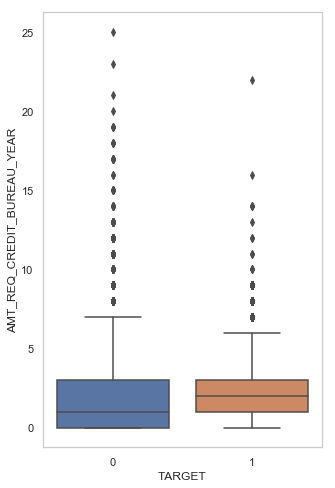

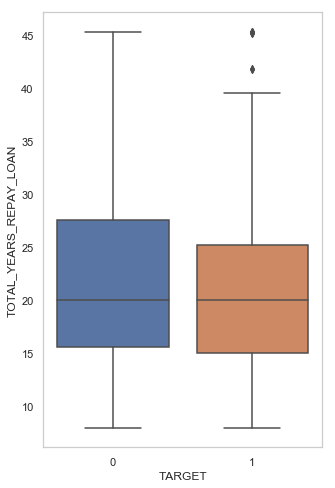

<Figure size 360x576 with 0 Axes>

In [197]:
app_data_numerical = app_data_cp.select_dtypes(include = ['float64', 'int64','int32'])

col_names = app_data_numerical.columns

for c in col_names:
    sns.boxplot(x='TARGET',y=app_data_cp[c], data = app_data_cp)
    plt.figure(figsize=(5,8))

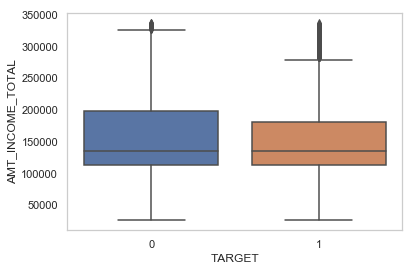

In [198]:
#Remove outlier for AMT_INCOME_TOTAL and plot it again

q1 = app_data_cp['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = app_data_cp['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = app_data_cp.loc[(app_data_cp['AMT_INCOME_TOTAL'] > fence_low) & (app_data_cp['AMT_INCOME_TOTAL'] < fence_high)]

sns.boxplot(x='TARGET',y=df_out['AMT_INCOME_TOTAL'], data = df_out)

#### Inferences:

1. DAYS_REGISTRATION data is more towards maximum and more outliers as compare to Target=1
2. DAYS_ID_PUBLISH data is more towards low side as compare to Target=1
3. EXT_SOURCE_2 maximum data is distributed towards low side as compare to Target=1
4. EXT_SOURCE_3 maximum data is distributed towards low side as compare to Target=1
5. AMT_REQ_CREDIT_BUREAU_YEAR data towards maximum only and high number of outliers as compare to Target=1
6. DAYS_BIRTH data is on high side as compare to Target=1
7. DAYS_EMPLOYED data is on high side as compare to Target=1
8. TOTAL_YEARS_REPAY_LOAN data distrbuted on high side as compare to Target=1
9. AMT_INCOME_TOTAL data distributed on high side as compare to Target=1

## 3. Bivariate Analysis 

### 3.1 Numerical Variables

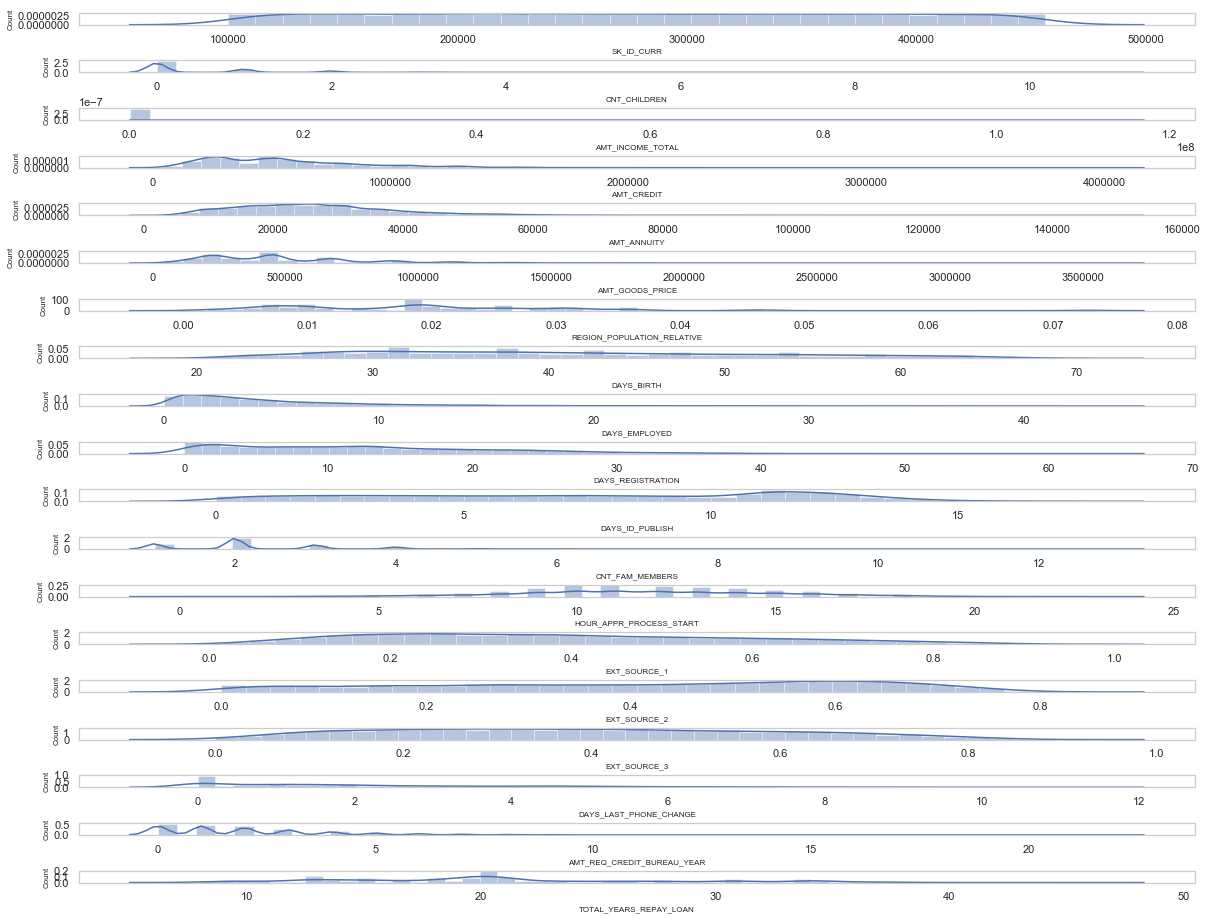

In [199]:
cols = app_data_numerical.columns

#sns.set(style="whitegrid")
target_defaulters = app_data_cp[app_data_cp['TARGET'] == 1] # 24825
target_no_defaulters = app_data_cp[app_data_cp['TARGET'] == 0] # 282686

fig, ax = plt.subplots(len(cols), figsize=(20,16))
plt.subplots_adjust(wspace=0.5,hspace=3)
for i, col_val in enumerate(cols):

    sns.distplot(target_defaulters[col_val].dropna(), hist=True, ax=ax[i])
   # ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Nothing can be infered from above graph

### 3.1.1 Correlation for numerical variables

In [200]:
#Function to remove outliers
def remove_outlier(df_in,arr):
    for col_name in arr:
        Q1 = df_in.quantile(0.25)
        Q3 = df_in.quantile(0.75)
        IQR = Q3-Q1 #Interquartile range
        df_out = df_in[~((df_in < (Q1 - 1.5 * IQR)) |(df_in > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [ ]:
# Make a copy of df anf remove outliers from that
df_out = app_data_cp.select_dtypes(include = ['float64', 'int64','int32'])
df_out = remove_outlier(df_out,df_out.columns)
df_out.fillna(0,inplace=True)
df_out.columns
#Drop the columns having NAN values
#df_out = df_out.drop(['FLAG_CONT_MOBILE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION'],axis=1)

In [ ]:
#cols = app_data_numerical.columns
#target_defaulters = app_data_cp[app_data_cp['TARGET'] == 1] # 24825
#target_no_defaulters = app_data_cp[app_data_cp['TARGET'] == 0] # 282686

corr = df_out.corr()
raw = corr[(corr.abs()>0.50) & (corr.abs() < 1.0)]
raw

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

### Correlation found on below variables:
1. AMT_CREDIT and TOTAL_YEARS_REPAY_LOAN
2. AMT_GOODS_PRICE and TOTAL_YEARS_REPAY_LOAN
3. CNT_FAM_MEMBERS and CNT_CHILDREN
4. AMT_CREDIT and AMT_ANNUITY
5. AMT_CREDIT and TOTAL_YEARS_REPAY_LOAN
6. AMT_CREDIT and AMT_GOODS_PRICE
7. AMT_ANNUITY and AMT_GOODS_PRICE

### 3.1 Categorical Variables

In [ ]:
sns.barplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=app_data_cp)

MALE have more income then Female

In [ ]:
#sns.countplot(x='CODE_GENDER', data=app_data_cp,hue='INCOME_TYPE')
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.countplot(x=app_data_cp['OCCUPATION_TYPE'], hue=app_data_cp['CODE_GENDER'], data=pd.melt(app_data_cp))
plt.show()

MALE are in majority laborers as Laborers are maximum in Defaulter case

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.countplot(x=app_data_cp['NAME_EDUCATION_TYPE'], hue=app_data_cp['OCCUPATION_TYPE'], data=pd.melt(app_data_cp))
plt.show()

Most loan given to Laborers,Drivers and sales staff who are having secondary special education - Drivers are more defaulters

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.countplot(x=app_data_cp['FLAG_DOCUMENT_6'], hue=app_data_cp['NAME_INCOME_TYPE'], data=pd.melt(app_data_cp))
plt.show()

Flag_6 document not given by Working and Commercial associate class

# Analyse the Previous data

In [ ]:
#Get the values
prev_data.head()

View Data

In [ ]:
#Make a copy of original data
prev_data_cp = prev_data

prev_data_cp.shape # 307511 rows and 122 columns

#Check the null values, na, percentage, duplicates
prev_data_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_unique', 'values_count_nounique', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in prev_data_cp.columns:
    tmp['column'] = [c]
    tmp['values'] = [prev_data_cp[c].unique()]
    tmp['values_count_unique'] = len(list(prev_data_cp[c].unique()))
    tmp['values_count_nounique'] = int(prev_data_cp[c].nunique())
    tmp['num_miss'] = prev_data_cp[c].isnull().sum()
    tmp['pct_miss'] = (prev_data_cp[c].isnull().sum()/ len(prev_data_cp)).round(3)*100
    prev_data_stats = prev_data_stats.append(tmp)
    
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
prev_data_stats.sort_values(by = 'values_count_unique', inplace = True, ascending = True)

# And set the index to Column Names
prev_data_stats.set_index('column', inplace = True)
prev_data_stats.sort_values(by = 'pct_miss', ascending = False).head(60)

Analyse Columns and decision to drop from dataset 

#### columns having around 99.9% missing values 
 RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY

In [ ]:
#Drop 2 columns 
prev_data_cp = prev_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1)
prev_data_cp.shape # 1670214 rows and 35 columns

### Data is balanced or imbalanced

In [ ]:
#Data is balanced or imbalanced

temp = prev_data_cp["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Previous Loan Application Status')

#62.1 % loans are approved
#18.9% are canceled
#17.4% are refused

#Data seems not highly imbalance

### Function to show percentage of values

In [ ]:
def plot_variable(col_name):
    
    total = len(prev_data_cp)
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=col_name, data=prev_data_cp)
    plt.title('% '+col_name)
    plt.xticks(rotation=45)
    #plt.xlabel('Number of Axles')
    plt.ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom',weight='bold') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

### Identify the Numerical and Categorical variables from the dataset

In [ ]:
# show only numerical columns
prev_data_numerical = prev_data_cp.select_dtypes(include = ['float64', 'int64','int32'])

#some variable are continuous one so need to considered as categorical and change its type to category
# NFLAG_LAST_APPL_IN_DAY
# NFLAG_INSURED_ON_APPROVAL
type_to_category = ['NFLAG_LAST_APPL_IN_DAY','NFLAG_INSURED_ON_APPROVAL']
prev_data_cp[type_to_category] = prev_data_cp[type_to_category].astype('category')

#categorical variables
prev_data_categorical = prev_data_cp.select_dtypes(include = ['O','category'])
#numerical variables
prev_data_numerical = prev_data_cp.select_dtypes(include = ['float64', 'int64'])
prev_data_numerical.info()

## 1. Categorical variables

### 1.1 Univariate Analysis

In [ ]:
prev_data_categorical = prev_data_cp.select_dtypes(include = ['O','category'])

for c in prev_data_categorical.columns:
    plot_variable(c)


### Observations:
1. NAME_CONTRACT_TYPE - Maximum Consumer loans and Cash loans are given
2. WEEKDAY_APPR_PROCESS_START - Almost same contribution by each day so this column can be removed 
3. FLAG_LAST_APPL_PER_CONTRACT - 99.5 % values are in Y so this column can be removed
4. NFLAG_LAST_APPL_IN_DAY - 99.6 % values are in N so this column can be removed
5. NAME_CASH_LOAN_PURPOSE - Majority of values are XAP and XNA
6. NAME_CONTRACT_STATUS - Mostly loans are approved
7. CODE_REJECT_REASON - Majority reason is XAP
8. NAME_TYPE_SUITE - This column can be removed
9. NAME_CLIENT_TYPE - Mostly are repeated customer
10. NAME_GOODS_CATEGORY - MAXIMUM are XNA
11. NAME_PRODUCT_TYPE - Maximum are XNA
12. NAME_YIELD_GROUP - This column can be removed

In [ ]:
# Drop below columns

prev_data_cp = prev_data_cp.drop(['WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',
                           'NAME_TYPE_SUITE','NAME_YIELD_GROUP'],axis=1)
prev_data_cp.info()

### 1.2. Segmented Analysis for Categorical based on NAME contract type variable

In [ ]:
def segmented_variable(col):
    plt.figure(figsize=(12,8))
    #plt.subplots_adjust(wspace=0.5,hspace=1)
    #plt.figure(1)
    order = prev_data_cp[col].value_counts(ascending=False).index
    total = len(prev_data_cp)
    ax = sns.countplot(x=col, data=prev_data_cp,hue='NAME_CONTRACT_STATUS' ,order=order)
    #plt.xticks(rotation=45)
    plt.xlabel(' '+col)
    plt.ylabel('Frequency [%] '+col)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    #plt.xlabel(' '+c, fontsize=8)
    #plt.show()
    


In [ ]:
prev_data_categorical = prev_data_cp.select_dtypes(include = ['O','category'])

for c in prev_data_categorical.columns:
    segmented_variable(c)

Inferences:
1. NAME_CONTRACT_TYPE - Maximum Consumer Loans are approved, Cash Loans 90% loans are cancelled and 50% loans are Refused
2. NAME_CASH_LOAN_PURPOSE- Maximum purpose XAP, Maximum cancelled for XNA, Same percent refused for XNA and XAP
3. NAME_PAYMENT_STATUS - Approx 50% loans are approved,11.2% are refused paid from Cash through bank and 18.7% are cancelled,
13% are approved paid from XNA 
4. CODE_REJECT_REASON - 18.9% are XAP and 10.5% are HC
5. NAME_CLIENT_TYPE - Maximum loans are approved to a Repeater customer and also the refused and cancel are high for Repeater ones, For new customer the approval rate is same as of cancelled for Repeater one.
6. NAME_GOODS_CATEGORY - Maximum loans are approved for XNA and Mobile, Maximum canceled and refused for XNA
7. NAME_PORTFOLIO - Approved mostly for POS then CASH, Maximum cancelled for XNA, Refused maximum for CASH
8. CHANNEL_TYPE - Maximum approved from country-wide follwed by Credit and Cash, Mostly rejected and cancelled in same percentage from credit and cash office
9. NAME_SELLER_INDUSTRY - Maximum approval in order to XNA,Consumer electronics and connectivity. Maximum Cancled and refused to XNA

## 2. Numeric Variables

### 2.1 Univariate Analysis on numerical variables

#### Plot the histogram

In [ ]:
prev_data_numerical.hist(bins=15, figsize=(30, 20), layout=(4, 8));

Observations:
1. columns have negative value
2. columns are having outliers

Plot boxplot and see the distrbution

In [ ]:
col_names= prev_data_numerical.columns

fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=prev_data_numerical[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

1. some plots are on negative side so first lets convert the negative values into positive and check if there are any data error
2. Drop column SELLERPLACE_AREA as not relevant


In [ ]:
 # Drop column SELLERPLACE_AREA
prev_data_cp = prev_data_cp.drop(['SELLERPLACE_AREA'

# DAYS_DECISION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
#Convert all the negative columns into positive by changing to year

#There is column DAYS_DECISION, values are converting into years
prev_data_cp['DAYS_DECISION'] = abs(round(prev_data_cp['DAYS_DECISION']/365,1))

#Covert into year
prev_data_cp['DAYS_FIRST_DUE'] = abs(round(prev_data_cp['DAYS_FIRST_DUE']/365,1))
#It seems data error as there are lot of value 1001.0 which means approx 1000 years so not possible
# Lets replace it with 0 as no idea what value can be possible
prev_data_cp.DAYS_FIRST_DUE.replace([1000.7, 0], inplace=True)

#Convert into year
prev_data_cp['DAYS_LAST_DUE_1ST_VERSION'] = abs(round(prev_data_cp['DAYS_LAST_DUE_1ST_VERSION']/365,1))
#It seems data error as there are lot of value 1000.6 which means approx 1000 years so not possible
# Lets replace it with 0 as no idea what value can be possible
prev_data_cp.DAYS_LAST_DUE_1ST_VERSION.replace([1000.7, 0], inplace=True)

#Convert into year
prev_data_cp['DAYS_LAST_DUE'] = abs(round(prev_data_cp['DAYS_LAST_DUE']/365,1))
#It seems data error as there are lot of value 1001.0 which means approx 1000 years so not possible
# Lets replace it with 0 as no idea what value can be possible
prev_data_cp.DAYS_LAST_DUE.replace([1000.7, 0], inplace=True)


#Convert into year
prev_data_cp['DAYS_TERMINATION'] = abs(round(prev_data_cp['DAYS_TERMINATION']/365,1))
#It seems data error as there are lot of value 1001.0 which means approx 1000 years so not possible
# Lets replace it with 0 as no idea what value can be possible
prev_data_cp.DAYS_TERMINATION.replace([1000.7, 0], inplace=True)



1. Note: Changing all the values from days to years but using the default name only(No change in column name only)
2. Assumption: Replace all data error value with 0

In [ ]:
# Plot the histogram again
prev_data_numerical = prev_data_cp.select_dtypes(include = ['float64', 'int64','int32'])
prev_data_numerical.hist(bins=15, figsize=(30, 20), layout=(4, 8));

Observations:
1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE same distrbution so coorelated
2. DAYS_LAST_DUE and DAYS_TERMINATION same distribution so correlated


Plot the distrbution by showing removed outliers

In [ ]:
# Remove the outliers
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = prev_data_numerical.columns

ig, ax = plt.subplots(len(col_names), figsize=(8,40))
plt.subplots_adjust(wspace=0.5,hspace=1)
for i, col_val in enumerate(col_names):
    x = prev_data_cp[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#### Inferences from Univariate Analysis

1. AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE are similar distribution so correlated
2. DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION are similar distrbution sp correlated

### 2.2 Segmented Analysis for numerical variables

In [ ]:
prev_data_numerical = prev_data_cp.select_dtypes(include = ['float64', 'int64','int32'])

col_names = prev_data_numerical.columns

for c in col_names:
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=prev_data_cp[c], data = prev_data_cp)
    plt.figure(figsize=(5,8))

In [ ]:
#Remove outlier for AMT_DOWN_PAYMENT and plot it again

q1 = prev_data_cp['AMT_DOWN_PAYMENT'].quantile(0.25)
q3 = prev_data_cp['AMT_DOWN_PAYMENT'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = prev_data_cp.loc[(prev_data_cp['AMT_DOWN_PAYMENT'] > fence_low) & (prev_data_cp['AMT_DOWN_PAYMENT'] < fence_high)]

sns.boxplot(x='NAME_CONTRACT_STATUS',y=df_out['AMT_DOWN_PAYMENT'], data = df_out)

### Plot scatter for more insights on outliers and data

In [ ]:
cols = prev_data_numerical.columns


for c in cols:
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(prev_data_cp['NAME_CONTRACT_STATUS'], prev_data_cp[c])
    ax.set_ylabel('Count of '+c)
    ax.set_xlabel('Distrbution of '+c+' based on Contract')
    plt.show()

Inferences from Segmented Analysis for numerical variables
1. AMT_ANNUITY - High values of Annuity are cancelled and values less then High are Refused 
2. AMT_APPLICATION - High value of application amount are Refused 
3. AMT_CREDIT - High value of application amount are Refused  same as AMT_APPLICATION
4. AMT_GOODS_PRICE - High values of GOODS_PRICE are cancelled and values less then High are Refused 
5. RATE_DOWN_PAYMENT - Equal number of values are Approved and Refused 
6. DAYS_REFUSED - More number of days means more chances of application get approved, Less days then Approved can give decision to Refused and then more less days means Refused.
7. CNT_PAYMENT - High values of application are cancelled and then Refused
8. DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION - All values are approved 
9. AMT_DOWN_PAYMENT = High the down payment more chances to get the application approved

## 3. Bivariate Analysis

### 3.1 Numerical Variables

#### 3.1.1 Correlation for Numerical Variables

In [ ]:
df_out = prev_data.select_dtypes(include = ['float64', 'int64','int32'])
corr = df_out.corr()
raw = corr[(corr.abs()>0.70) & (corr.abs() < 1.0)]
raw

In [ ]:
approved = prev_data_cp[prev_data_cp['NAME_CONTRACT_STATUS'] == 'Approved']
cancelled = prev_data_cp[prev_data_cp['NAME_CONTRACT_STATUS'] == 'Canceled']
refused = prev_data_cp[prev_data_cp['NAME_CONTRACT_STATUS'] == 'Refused']
unused = prev_data_cp[prev_data_cp['NAME_CONTRACT_STATUS'] == 'Unused offer']

#### Plot for Approved Loans

In [ ]:
df_out = approved.select_dtypes(include = ['float64', 'int64','int32'])
corr = df_out.corr()
raw = corr[(corr.abs()>0.70) & (corr.abs() < 1.0)]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);
#raw

#### Plot for Cancelled loans

In [ ]:
df_out = cancelled.select_dtypes(include = ['float64', 'int64','int32'])
corr = cancelled.corr()
#raw = corr[(corr.abs()>0.70) & (corr.abs() < 1.0)]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

#### Plot for Refused Loans

In [ ]:
df_out = refused.select_dtypes(include = ['float64', 'int64','int32'])
corr = df_out.corr()
raw = corr[(corr.abs()>0.70) & (corr.abs() < 1.0)]
#raw
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

#### Plot for unused loans

In [ ]:
df_out = unused.select_dtypes(include = ['float64', 'int64','int32'])
corr = df_out.corr()
raw = corr[(corr.abs()>0.70) & (corr.abs() < 1.0)]
#raw
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

### Inferences from ALL
1. AMT_ANNUITY, AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
3. DAYS_DECISION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION are correlated

### Inferences from Approved Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_GOODS_PRICE - AMT_ANNUITY,AMT_CREDIT

### Inferences from Cancelled Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_DOWN_PAYMENT - AMT_APPLICATION,AMT_GOODS_PRICE
5. AMT_GOODS_PRICE - AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT

### Inference from Refused Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_GOODS_PRICE - AMT_APPLICATION,AMT_ANNUITY,AMT_CREDIT

### Inference from Unused Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_GOODS_PRICE - AMT_ANNUITY,AMT_CREDIT
5. AMT_DOWN_PAYMENT -- RATE_DOWN_PAYMENT

### 3.1 Categorical Variables

In [ ]:
sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_APPLICATION',data=prev_data_cp)

Inference: Higher the amount client applied more chances bank refuse the application

In [ ]:
sns.barplot(x='NAME_SELLER_INDUSTRY',y='AMT_APPLICATION',data=prev_data_cp)
plt.xticks(rotation=45)

Inference: Tourism industry are mostly applied for higher loans

# Conclusion from application dataset

Categorical Variables

1. CODE_GENDER : For Defaulters loan has been given more to MALE as compare to no Defaulters
2. INCOME_TYPE: For Defaulters loan given to pensioners are less as compare to no Defaulters
3. NAME_EDUCATION_TYPE : As compare to no defaulters more loan has been distrbuted to secondary and less to Higher Education
4. NAME_FAMILY_STATUS : Less loan given to defaulters as compare to no defaulter for Married people, more loan distrbuted to single as compare to no defaulter 
5. NAME_HOUSING_TYPE : More loans given to customers living with parents in defaulter
6. OCCUPATION_TYPE :  More loans given to customers who are Drivers in defaulter
7. REGION_RATING_CLIENT : for region 3 the data is more in defaulter, It is relationshi with REGION_RATING_W_CLIENT
8. REG_CITY_NOT_WORK_CITY : More loans given to customers whose client''s permanent address does not 
    match work address in defaulter
9. ORGANIZATION_TYPE : More loans has been given to customers who are self employed as compare to no Defaulters
 
Numerical Variables
1. DAYS_REGISTRATION data is more towards maximum and more outliers as compare to Target=1
2. DAYS_ID_PUBLISH data is more towards low side as compare to Target=1
3. EXT_SOURCE_2 maximum data is distributed towards low side as compare to Target=1
4. EXT_SOURCE_3 maximum data is distributed towards low side as compare to Target=1
5. AMT_REQ_CREDIT_BUREAU_YEAR data towards maximum only and high number of outliers as compare to Target=1
6. DAYS_BIRTH data is on high side as compare to Target=1
7. DAYS_EMPLOYED data is on high side as compare to Target=1
8. TOTAL_YEARS_REPAY_LOAN data distrbuted on high side as compare to Target=1
9. AMT_INCOME_TOTAL data distributed on high side as compare to Target=1 

From above Age,total years to repay loan and total income all are on high side for customers having payment difficulties
Any other conclusion is difficult to get from numeric variables from given data

Correlation
1. AMT_CREDIT and TOTAL_YEARS_REPAY_LOAN
2. AMT_GOODS_PRICE and TOTAL_YEARS_REPAY_LOAN
3. CNT_FAM_MEMBERS and CNT_CHILDREN
4. AMT_CREDIT and AMT_ANNUITY
5. AMT_CREDIT and TOTAL_YEARS_REPAY_LOAN
6. AMT_CREDIT and AMT_GOODS_PRICE
7. AMT_ANNUITY and AMT_GOODS_PRICE

1. More the given loan, increase number of years for customer to repay loan, increase anuuity, increase goods price amount
2. Family members increase count also increase the count of children


# Conclusion from Previous dataset

1. NAME_CONTRACT_TYPE - Maximum Consumer Loans are approved, Cash Loans 90% loans are cancelled and 50% loans are Refused
2. NAME_CASH_LOAN_PURPOSE- Maximum purpose XAP, Maximum cancelled for XNA, Same percent refused for XNA and XAP
3. NAME_PAYMENT_STATUS - Approx 50% loans are approved,11.2% are refused paid from Cash through bank and 18.7% are cancelled,
13% are approved paid from XNA 
4. CODE_REJECT_REASON - 18.9% are XAP and 10.5% are HC
5. NAME_CLIENT_TYPE - Maximum loans are approved to a Repeater customer and also the refused and cancel are high for Repeater ones, For new customer the approval rate is same as of cancelled for Repeater one.
6. NAME_GOODS_CATEGORY - Maximum loans are approved for XNA and Mobile, Maximum canceled and refused for XNA
7. NAME_PORTFOLIO - Approved mostly for POS then CASH, Maximum cancelled for XNA, Refused maximum for CASH
8. CHANNEL_TYPE - Maximum approved from country-wide follwed by Credit and Cash, Mostly rejected and cancelled in same percentage from credit and cash office
9. NAME_SELLER_INDUSTRY - Maximum approval in order to XNA,Consumer electronics and connectivity. Maximum Cancled and refused to XNA

#As per bank respect mostly consumer loans are approved and cash loans are cancelled or refused having purpose XNA or XAP.
#Bank did not disclose the reason for rejecting loans

1. AMT_ANNUITY - High values of Annuity are cancelled and values less then High are Refused 
2. AMT_APPLICATION - High value of application amount are Refused 
3. AMT_CREDIT - High value of application amount are Refused  same as AMT_APPLICATION
4. AMT_GOODS_PRICE - High values of GOODS_PRICE are cancelled and values less then High are Refused 
5. RATE_DOWN_PAYMENT - Equal number of values are Approved and Refused 
6. DAYS_REFUSED - More number of days means more chances of application get approved, Less days then Approved can give decision to Refused and then more less days means Refused.
7. CNT_PAYMENT - High values of application are cancelled and then Refused
8. DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION - All values are approved 
9. AMT_DOWN_PAYMENT = High the down payment more chances to get the application approved

#As per bank if there is high amount applied by customer and if there is high Annuity bank refused the application
#Customer done the high down payment, bank mostly approves the application

#### Correlation
###Inferences from Approved Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_GOODS_PRICE - AMT_ANNUITY,AMT_CREDIT

###Inferences from Cancelled Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_DOWN_PAYMENT - AMT_APPLICATION,AMT_GOODS_PRICE are correlated
5. AMT_GOODS_PRICE - AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT are correlated

###Inference from Refused Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_GOODS_PRICE - AMT_APPLICATION,AMT_ANNUITY,AMT_CREDIT are correlated

###Inference from Unused Loan
1. AMT_ANNUITY- AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are correlated
2. AMT_APPLICATION - AMT_ANNUITY,AMT_CREDIT are correlated
3. AMT_CREDIT- AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE are correlated
4. AMT_GOODS_PRICE - AMT_ANNUITY,AMT_CREDIT are correlated
5. AMT_DOWN_PAYMENT -- RATE_DOWN_PAYMENT are correlated
